# Sunitha Nagrath Lab (notebook 3)

In [1]:
%pip install pandas numpy tensorflow scikit-learn matplotlib seaborn joblib spicy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from scipy.stats import norm

In [3]:
import os
print(os.getcwd())

/home/tyoneyam/nagrathLab


## Merge Datasets

In [4]:
# Adjust EM_files

# Load the CSV files
EM_memb = pd.read_csv('fixed_old_datasets/E_memb.csv')
EM_nuclei = pd.read_csv('fixed_old_datasets/E.csv')

# Drop rows where "Annotation" is empty
EM_memb = EM_memb.dropna(subset=['Annotation'])
EM_nuclei = EM_nuclei.dropna(subset=['Annotation'])

# Reset index for both
EM_memb.reset_index(drop=True, inplace=True)
EM_nuclei.reset_index(drop=True, inplace=True)

# Concatinate "Memb." to column names beyond "Annotation" for EM_memb
EM_memb.columns = list(EM_memb.columns[:3]) + ['Memb.' + col for col in EM_memb.columns[3:]]

# Concatinate "Nuclei." to column names beyond "Annotation" for EM_nuc
EM_nuclei.columns = list(EM_nuclei.columns[:4]) + ['Nue.' + col for col in EM_nuclei.columns[4:]]

# Merge the two on annotation
EM = pd.merge(EM_memb, EM_nuclei, left_index=True, right_index=True, how='inner')
EM.rename(columns={'ImageNumber_x':'ImageNumber', 'ObjectNumber_x':'ObjectNumber', 'Annotation_x':'Annotation'}, inplace=True)

# Add a column "BaseFile"
EM['BaseFile'] = 'E_memb.csv'
EM.drop(columns=['Cell_objectnumber'], inplace=True)

# Print head
print(EM.head())
print(EM.shape)

# Save the merged dataset
EM.to_csv('fixed_old_datasets/EM.csv', index=False)

   ImageNumber  ObjectNumber Annotation  Memb.AreaShape_Area  \
0            1             3          E                 5270   
1            1             4          E                 5093   
2            1             5          E                 7616   
3            1             6          E                 8138   
4            1             7          E                 7806   

   Memb.AreaShape_BoundingBoxArea  Memb.AreaShape_BoundingBoxMaximum_X  \
0                            8774                                 1277   
1                            8010                                 1180   
2                           13420                                 1190   
3                           12210                                 1304   
4                           12125                                 1100   

   Memb.AreaShape_BoundingBoxMaximum_Y  Memb.AreaShape_BoundingBoxMinimum_X  \
0                                  310                                 1170   
1           

In [5]:
# Adjust M_files

# Load the CSV files
M_memb = pd.read_csv('fixed_old_datasets/MyExpt_FilteredCells_with_annotation_additional_corresponding_cell.csv')
M_nuclei = pd.read_csv('fixed_old_datasets/MyExpt_FilteredNuclei_nei_annotated_additional_corresponding_cell.csv')

# For M_memb, replace the third column name with "Annotation"
M_memb.columns = list(M_memb.columns[:2]) + ['Annotation'] + list(M_memb.columns[3:])

# Drop rows where "Annotation" is empty
M_memb = M_memb.dropna(subset=['Annotation'])
M_nuclei = M_nuclei.dropna(subset=['Annotation'])

# Reset the index for both
M_memb.reset_index(drop=True, inplace=True)
M_nuclei.reset_index(drop=True, inplace=True)

# Concatinate "Memb." to column names beyond "Annotation" for EM_memb
M_memb.columns = list(M_memb.columns[:3]) + ['Memb.' + col for col in M_memb.columns[3:]]

# Concatinate "Nuclei." to column names beyond "Annotation" for EM_nuc
M_nuclei.columns = list(M_nuclei.columns[:4]) + ['Nue.' + col for col in M_nuclei.columns[4:]]

# Merge the two on row index
M = pd.merge(M_memb, M_nuclei, left_index=True, right_index=True, how='inner')
M.rename(columns={'ImageNumber_x':'ImageNumber', 'ObjectNumber_x':'ObjectNumber', 'Annotation_x':'Annotation'}, inplace=True)

# Add a column "BaseFile"
M['BaseFile'] = 'MyExpt_FilteredCells_with_annotation_additional_corresponding_cell.csv'
M.drop(columns=['Cell_objectnumber'], inplace=True)

# Print head
print(M.head())
print(M.shape)

# Save the merged dataset
M.to_csv('fixed_old_datasets/M.csv', index=False)

   ImageNumber  ObjectNumber Annotation  Memb.AreaShape_Area  \
0            1             1          M                 4198   
1            1             3          M                 4945   
2            1             4          M                 6059   
3            1             8          M                 5138   
4            1            11          M                 6523   

   Memb.AreaShape_BoundingBoxArea  Memb.AreaShape_BoundingBoxMaximum_X  \
0                           10787                                  949   
1                           11600                                 1277   
2                           14429                                 2237   
3                           21942                                 1243   
4                           19430                                 1201   

   Memb.AreaShape_BoundingBoxMaximum_Y  Memb.AreaShape_BoundingBoxMinimum_X  \
0                                  222                                  882   
1           

### Merge

In [6]:
# Merge EM and M

# 合并数据
final_combined_data1 = pd.concat([M, EM], ignore_index=True)

# 查看合并后的数据
print(final_combined_data1.head())
print(final_combined_data1.shape)

# 保存合并后的数据
final_combined_data1.to_csv('111524final_combined_data1.csv', index=False)

   ImageNumber  ObjectNumber Annotation  Memb.AreaShape_Area  \
0            1             1          M                 4198   
1            1             3          M                 4945   
2            1             4          M                 6059   
3            1             8          M                 5138   
4            1            11          M                 6523   

   Memb.AreaShape_BoundingBoxArea  Memb.AreaShape_BoundingBoxMaximum_X  \
0                           10787                                  949   
1                           11600                                 1277   
2                           14429                                 2237   
3                           21942                                 1243   
4                           19430                                 1201   

   Memb.AreaShape_BoundingBoxMaximum_Y  Memb.AreaShape_BoundingBoxMinimum_X  \
0                                  222                                  882   
1           

## Scale Datasets

### Scale Old

In [7]:
# Prepare features
X_old = final_combined_data1.drop(columns=['ImageNumber', 'ObjectNumber', 'Annotation', 'BaseFile'])

# Drop nan columns "_NormalizedMoment_0_0", "_NormalizedMoment_1_0", and "_NormalizedMoment_0_1" since it only contains NaN values
nan_columns = ['Memb.AreaShape_NormalizedMoment_0_0',
               'Memb.AreaShape_NormalizedMoment_0_1',
               'Memb.AreaShape_NormalizedMoment_1_0',
               'Nue.AreaShape_NormalizedMoment_0_0',
               'Nue.AreaShape_NormalizedMoment_0_1',
               'Nue.AreaShape_NormalizedMoment_1_0']
columns_to_drop = [col for col in nan_columns if col in X_old.columns]
X_old = X_old.drop(columns=columns_to_drop)

# Drop other unecessary columns
# Mean_Cells_Location_Center_X, Mean_Cells_Location_Center_Y, 
# Mean_Cells_Location_Center_Z, Mean_Cells_Number_Object_Number, 
# Number_Object_Number, Parent_Nuclei, AreaShape_BoundingBoxMaximum_X, 
# AreaShape_BoundingBoxMaximum_Y, AreaShape_BoundingBoxMinimum_X, 
# AreaShape_BoundingBoxMinimum_Y, AreaShape_Center_X, AreaShape_Center_Y, 
# Children_Cells_Count, Location_Center_Z, Location_Center_X, Location_Center_Y
unecessary_columns = ['Memb.Mean_Cells_Location_Center_X', 
                      'Memb.Mean_Cells_Location_Center_Y', 
                      'Memb.Mean_Cells_Location_Center_Z',
                      'Memb.Mean_Cells_Number_Object_Number', 
                      'Memb.Number_Object_Number', 
                      'Memb.Parent_Nuclei', 
                      'Memb.AreaShape_BoundingBoxMaximum_X',
                      'Memb.AreaShape_BoundingBoxMaximum_Y',
                      'Memb.AreaShape_BoundingBoxMinimum_X',
                      'Memb.AreaShape_BoundingBoxMinimum_Y',
                      'Memb.AreaShape_Center_X',
                      'Memb.AreaShape_Center_Y',
                      'Memb.Children_Cells_Count',
                      'Memb.Location_Center_Z',
                      'Memb.Location_Center_X',
                      'Memb.Location_Center_Y',
                      'Nue.Mean_Cells_Location_Center_X', 
                      'Nue.Mean_Cells_Location_Center_Y', 
                      'Nue.Mean_Cells_Location_Center_Z',
                      'Nue.Mean_Cells_Number_Object_Number', 
                      'Nue.Number_Object_Number', 
                      'Nue.Parent_Nuclei', 
                      'Nue.AreaShape_BoundingBoxMaximum_X',
                      'Nue.AreaShape_BoundingBoxMaximum_Y',
                      'Nue.AreaShape_BoundingBoxMinimum_X',
                      'Nue.AreaShape_BoundingBoxMinimum_Y',
                      'Nue.AreaShape_Center_X',
                      'Nue.AreaShape_Center_Y',
                      'Nue.Children_Cells_Count',
                      'Nue.Location_Center_Z',
                      'Nue.Location_Center_X',
                      'Nue.Location_Center_Y',]
columns_to_drop = [col for col in unecessary_columns if col in X_old.columns]
X_old = X_old.drop(columns=columns_to_drop)

# Drop columns that doesnt exist in new data
unmatching_columns = ['ImageNumber_y', 
                      'ObjectNumber_y',
                      'Annotation_y',
                      'Nue.Mean_Cells_Distance_Centroid_FilteredNuclei_nei'] 
columns_to_drop = [col for col in unmatching_columns if col in X_old.columns]
X_old = X_old.drop(columns=columns_to_drop)

# Save X_old
X_old.to_csv('111524X_old.csv', index=False)

# Scalar
scaler = StandardScaler()
X_old_scaled = scaler.fit_transform(X_old)

# Save scalar
joblib.dump(scaler, '111524scaler_old_data.pkl')

['111524scaler_old_data.pkl']

### Scale New

In [8]:
# Load new data from Combined_Data.csv
final_combined_data2 = pd.read_csv('Combined_Data.csv')

# Prepare features
X_new = final_combined_data2.drop(columns=['ImageNumber', 'ObjectNumber', 'Annotation'])

# Drop columns "_NormalizedMoment_0_0", "_NormalizedMoment_1_0", and "_NormalizedMoment_0_1" since it only contains NaN values
nan_columns = ['Memb.AreaShape_NormalizedMoment_0_0',
               'Memb.AreaShape_NormalizedMoment_0_1',
               'Memb.AreaShape_NormalizedMoment_1_0',
               'Nue.AreaShape_NormalizedMoment_0_0',
               'Nue.AreaShape_NormalizedMoment_0_1',
               'Nue.AreaShape_NormalizedMoment_1_0']
columns_to_drop = [col for col in nan_columns if col in X_new.columns]
X_new = X_new.drop(columns=columns_to_drop)

# Drop other unecessary columns
# Mean_Cells_Location_Center_X, Mean_Cells_Location_Center_Y, 
# Mean_Cells_Location_Center_Z, Mean_Cells_Number_Object_Number, 
# Number_Object_Number, Parent_Nuclei, AreaShape_BoundingBoxMaximum_X, 
# AreaShape_BoundingBoxMaximum_Y, AreaShape_BoundingBoxMinimum_X, 
# AreaShape_BoundingBoxMinimum_Y, AreaShape_Center_X, AreaShape_Center_Y, 
# Children_Cells_Count, Location_Center_Z, Location_Center_X, Location_Center_Y
unecessary_columns = ['Memb.Mean_Cells_Location_Center_X', 
                      'Memb.Mean_Cells_Location_Center_Y', 
                      'Memb.Mean_Cells_Location_Center_Z',
                      'Memb.Mean_Cells_Number_Object_Number', 
                      'Memb.Number_Object_Number', 
                      'Memb.Parent_Nuclei', 
                      'Memb.AreaShape_BoundingBoxMaximum_X',
                      'Memb.AreaShape_BoundingBoxMaximum_Y',
                      'Memb.AreaShape_BoundingBoxMinimum_X',
                      'Memb.AreaShape_BoundingBoxMinimum_Y',
                      'Memb.AreaShape_Center_X',
                      'Memb.AreaShape_Center_Y',
                      'Memb.Children_Cells_Count',
                      'Memb.Location_Center_Z',
                      'Memb.Location_Center_X',
                      'Memb.Location_Center_Y',
                      'Nue.Mean_Cells_Location_Center_X', 
                      'Nue.Mean_Cells_Location_Center_Y', 
                      'Nue.Mean_Cells_Location_Center_Z',
                      'Nue.Mean_Cells_Number_Object_Number', 
                      'Nue.Number_Object_Number', 
                      'Nue.Parent_Nuclei', 
                      'Nue.AreaShape_BoundingBoxMaximum_X',
                      'Nue.AreaShape_BoundingBoxMaximum_Y',
                      'Nue.AreaShape_BoundingBoxMinimum_X',
                      'Nue.AreaShape_BoundingBoxMinimum_Y',
                      'Nue.AreaShape_Center_X',
                      'Nue.AreaShape_Center_Y',
                      'Nue.Children_Cells_Count',
                      'Nue.Location_Center_Z',
                      'Nue.Location_Center_X',
                      'Nue.Location_Center_Y',]
columns_to_drop = [col for col in unecessary_columns if col in X_new.columns]
X_new = X_new.drop(columns=columns_to_drop)

# Drop columns that doesnt exist in new data
unmatching_columns = ['Memb.Children_FilteredNuclei__Count', 
                      'Memb.Mean_FilteredNuclei__Children_Cells_Count', 
                      'Memb.Mean_FilteredNuclei__Distance_Centroid_FilteredCells', 
                      'Memb.Mean_FilteredNuclei__Location_Center_X',
                      'Memb.Mean_FilteredNuclei__Location_Center_Y',
                      'Memb.Mean_FilteredNuclei__Location_Center_Z', 
                      'Memb.Mean_FilteredNuclei__Number_Object_Number', 
                      'index_y', 
                      'ImageNumber_y',
                      'ObjectNumber_y',
                      'Annotation_y',
                      'Nue.Parent_FilteredNuclei_'] 
columns_to_drop = [col for col in unmatching_columns if col in X_new.columns]
X_new = X_new.drop(columns=columns_to_drop)

# Save X_new
X_new.to_csv('111524X_new.csv', index=False)

# Scalar
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)

# Save scalar
joblib.dump(scaler, '111524scaler_new_data.pkl')

['111524scaler_new_data.pkl']

## Normalize Data
Normalize since the New data seems to have very different patterns from the Old data

## Method 1

### Find Distribution of Old Data and Fit to New Data

Old Data Stats:
                                  Mean Std Dev
Memb.AreaShape_Area               0.0     1.0
Memb.AreaShape_BoundingBoxArea   -0.0     1.0
Memb.AreaShape_CentralMoment_0_0  0.0     1.0
Memb.AreaShape_CentralMoment_0_1 -0.0     1.0
Memb.AreaShape_CentralMoment_0_2 -0.0     1.0

New Data Stats:
                                  Mean Std Dev
Memb.AreaShape_Area              -0.0     1.0
Memb.AreaShape_BoundingBoxArea    0.0     1.0
Memb.AreaShape_CentralMoment_0_0 -0.0     1.0
Memb.AreaShape_CentralMoment_0_1  0.0     1.0
Memb.AreaShape_CentralMoment_0_2 -0.0     1.0

New Data Normalized Stats:
                                       Mean   Std Dev
Memb.AreaShape_Area              -0.003825  0.971013
Memb.AreaShape_BoundingBoxArea   -0.015321  0.838829
Memb.AreaShape_CentralMoment_0_0 -0.003825  0.971013
Memb.AreaShape_CentralMoment_0_1 -0.004193   0.93669
Memb.AreaShape_CentralMoment_0_2 -0.023327  0.544081


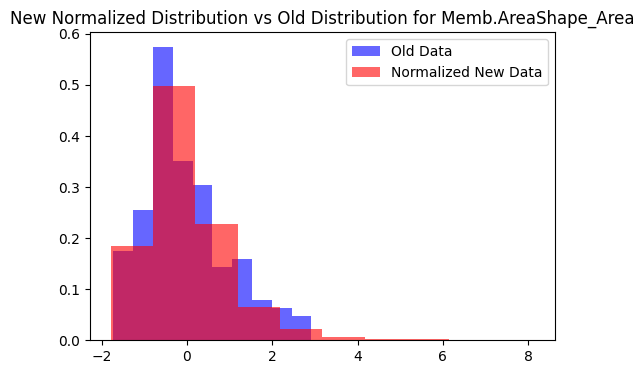

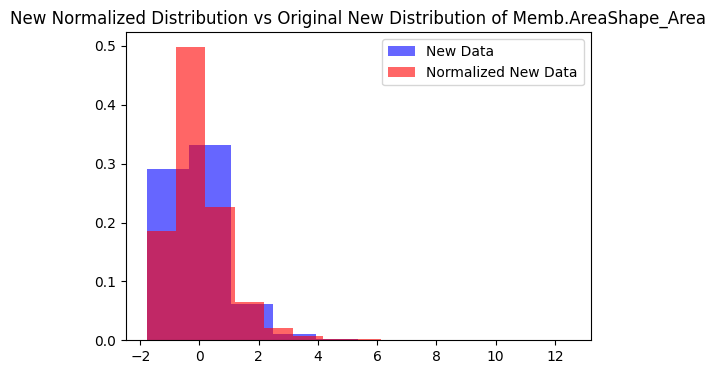

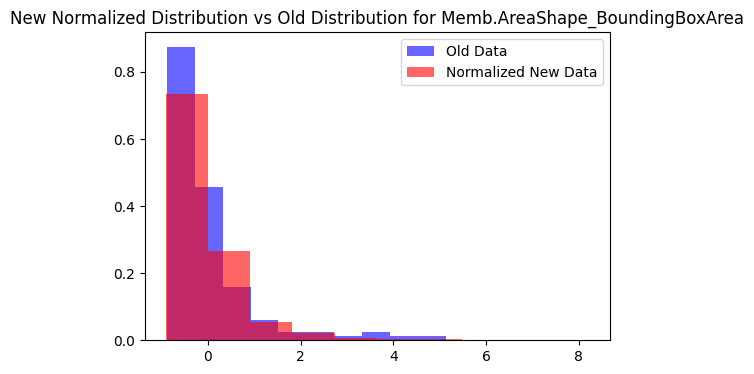

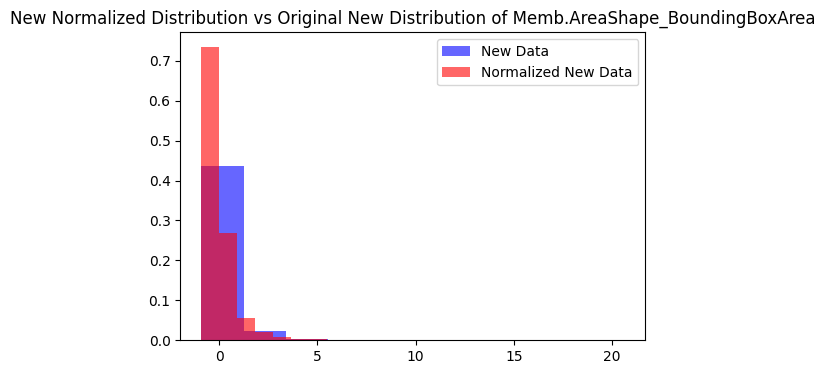

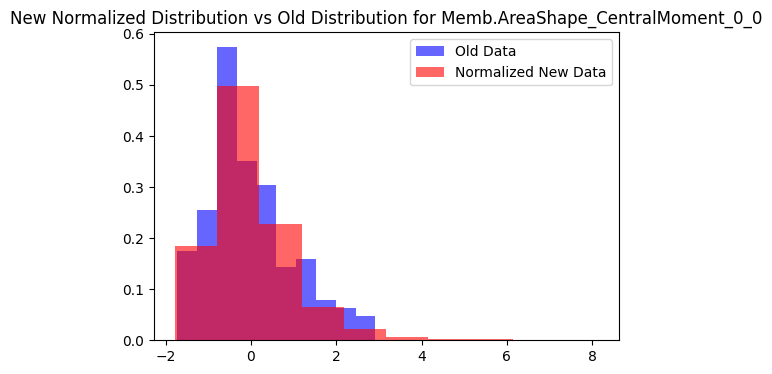

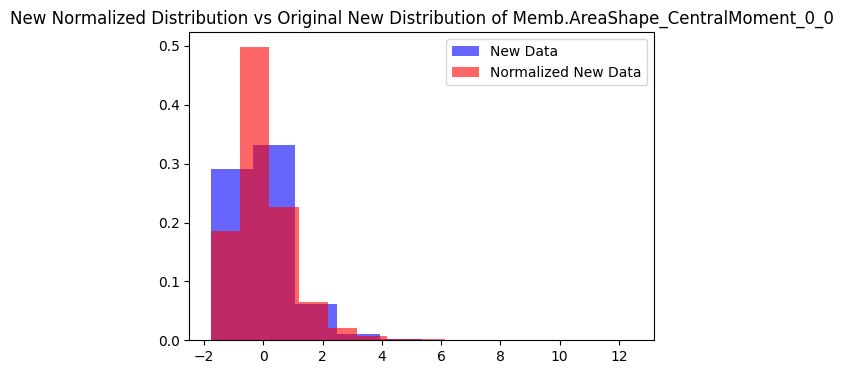

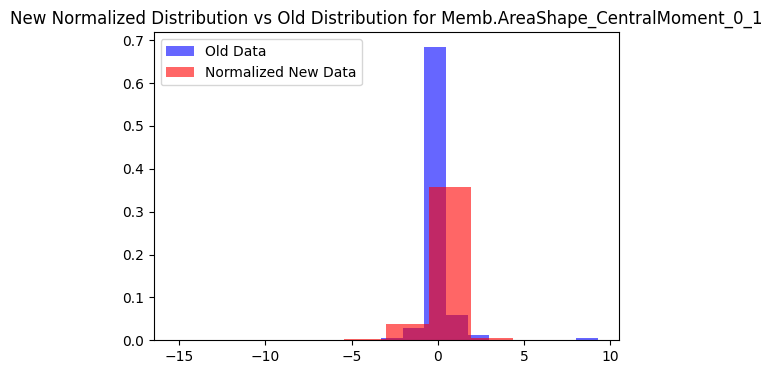

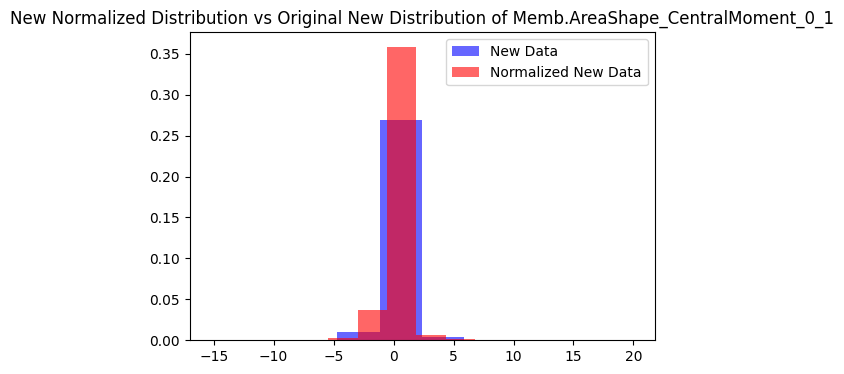

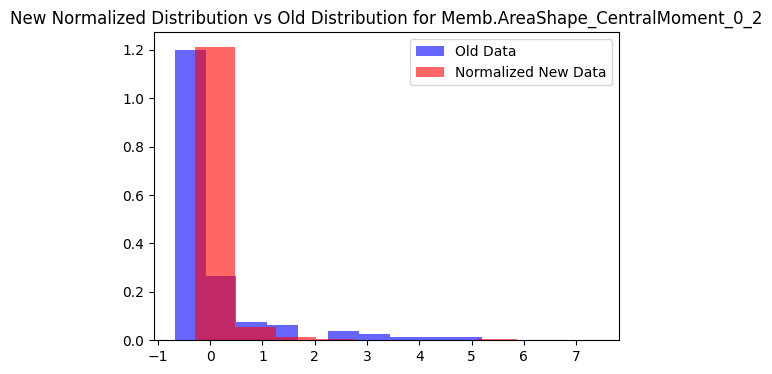

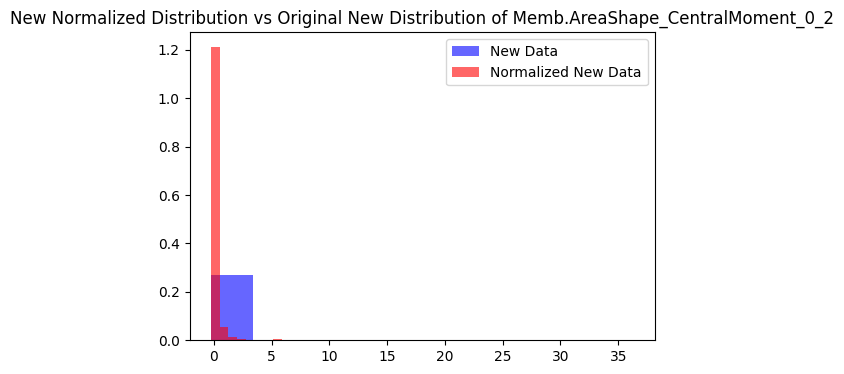

In [9]:
# Method 1

# Fit each feature to a normal distribution and transform the new data
X_old_scaled_df = pd.DataFrame(X_old_scaled)
X_new_scaled_df = pd.DataFrame(X_new_scaled)
X_new_normalized_1 = pd.DataFrame(X_new_scaled)

# Columns to not normalize are index 18 and 118
columns_to_skip = [18, 118]

# Save mean and std dev of each feature to a df
# df has columns: Mean, Std Dev and Index: Features
X_old_feature_stats = pd.DataFrame(index=X_old.columns, columns=['Mean', 'Std Dev'])
X_new_feature_stats = pd.DataFrame(index=X_new.columns, columns=['Mean', 'Std Dev'])
X_new_normalized_method_1_feature_stats = pd.DataFrame(index=X_new.columns, columns=['Mean', 'Std Dev'])

# for all features except columns to skip
for feature in X_old_scaled_df.columns:
    if feature in columns_to_skip:
        continue

    # Estimate parameters of the normal distribution
    mu, sigma = norm.fit(X_old_scaled_df[feature])

    # Add to old data stats
    feature_name = X_old.columns[feature]
    X_old_feature_stats.loc[feature_name] = [mu, sigma]

    # Transform new data to match this distribution
    X_new_normalized_1[feature] = (X_new_normalized_1[feature] - mu) / sigma  # Standardize
    X_new_normalized_1[feature] = norm.ppf(norm.cdf(X_new_normalized_1[feature], loc=mu, scale=sigma), loc=mu, scale=sigma)  # Map to fit distribution
    
    # Infinite values can arise during the 
    # transformation process due to several reasons:
    #
    # Extreme Values: If the new data contains 
    # values that are extremely high or low 
    # compared to the old data, the 
    # standardization and subsequent 
    # transformation steps can result in values 
    # that are mapped to infinity.
    #
    # Numerical Precision: The cumulative 
    # distribution function (CDF) and percent 
    # point function (PPF) calculations involve 
    # floating-point arithmetic, which can 
    # sometimes lead to numerical precision 
    # issues, especially for values far in the tails 
    # of the distribution.
    #  
    # Outliers: If the new data has outliers that 
    # are not present in the old data, these 
    # outliers can be transformed into infinite 
    # values during the normalization process.
    #  
    # Data Distribution Mismatch: If the new 
    # data's distribution is significantly 
    # different from the old data's distribution, 
    # the transformation process might not 
    # handle the differences well, leading to 
    # infinite values.
    #  
    # To handle these infinite values, you can replace them with finite values, 
    # as you have done, or consider other strategies like clipping or imputation 
    # to ensure the transformed data remains within a reasonable range.
    X_new_normalized_1[feature] = X_new_normalized_1[feature].replace([np.inf, -np.inf], [X_old_scaled_df[feature].max(), X_old_scaled_df[feature].min()])

    # Add to new data stats
    mu, sigma = norm.fit(X_new_scaled_df[feature])
    X_new_feature_stats.loc[feature_name] = [mu, sigma]
    mu, sigma = norm.fit(X_new_normalized_1[feature])
    X_new_normalized_method_1_feature_stats.loc[feature_name] = [mu, sigma]

# Print out stats
print("Old Data Stats:\n", X_old_feature_stats.head())
print("\nNew Data Stats:\n", X_new_feature_stats.head())
print("\nNew Data Normalized Stats:\n", X_new_normalized_method_1_feature_stats.head())
# Save stats
X_old_feature_stats.to_csv('111524old_data_feature_stats.csv')
X_new_feature_stats.to_csv('111524new_data_feature_stats.csv')
X_new_normalized_method_1_feature_stats.to_csv('111524new_data_normalized_method_one_feature_stats.csv')

# Plot if first 5 features
for feature in range(5):
    # Plot old data distribution
    plt.figure(figsize=(6, 4))
    plt.hist(X_old_scaled_df[feature], bins=10, density=True, alpha=0.6, color='b', label="Old Data")
    plt.hist(X_new_normalized_1[feature], bins=10, density=True, alpha=0.6, color='r', label="Normalized New Data")
    plt.title(f"New Normalized Distribution vs Old Distribution for {X_old.columns[feature]}")
    plt.legend()
    plt.show()

    # Plot new data normalized vs original
    plt.figure(figsize=(6, 4))
    plt.hist(X_new_scaled_df[feature], bins=10, density=True, alpha=0.6, color='b', label="New Data")
    plt.hist(X_new_normalized_1[feature], bins=10, density=True, alpha=0.6, color='r', label="Normalized New Data")
    plt.title(f"New Normalized Distribution vs Original New Distribution of {X_old.columns[feature]}")
    plt.legend()
    plt.show()

### PCA of Old Data

In [10]:
# PCA of Old Data

pca_old = PCA(n_components=2)
X_old_pca = pca_old.fit_transform(X_old_scaled)

# X_pca would have a shape of (n_samples, n_components)
print("n_samples = ", X_old_scaled.shape[0])
print("X_pca shape: ", X_old_pca.shape)

# y = annotation
y = final_combined_data1['Annotation'].values

# Print out explained variance ratio
print("Explained variance ratio: ", pca_old.explained_variance_ratio_)

n_samples =  135
X_pca shape:  (135, 2)
Explained variance ratio:  [0.21576205 0.0901637 ]


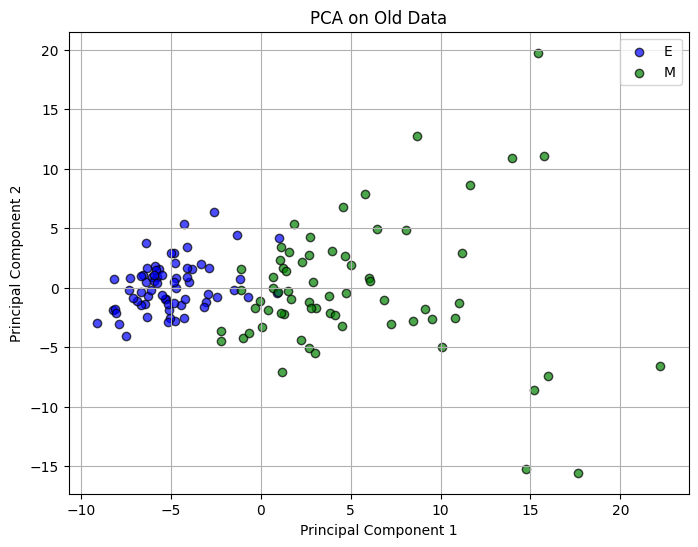

In [11]:
# plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_old_pca[y == 'E', 0], X_old_pca[y == 'E', 1], c='blue', label='E', alpha=0.7, edgecolor='k')
plt.scatter(X_old_pca[y == 'M', 0], X_old_pca[y == 'M', 1], c='green', label='M', alpha=0.7, edgecolor='k')
plt.title('PCA on Old Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/pca_on_data1.png", format='png', bbox_inches='tight')
plt.close()

### Apply to Normalized New Data

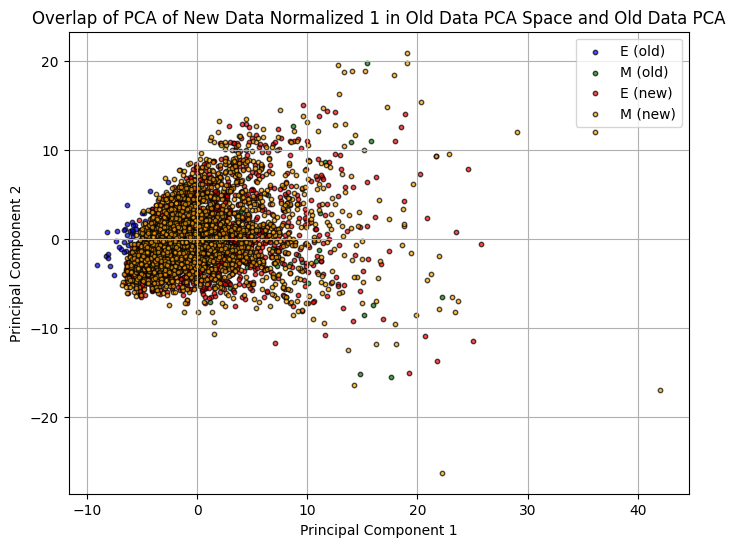

In [12]:
# Transform the old and new data using the fitted PCA
X_new_applied_to_pca_old = pca_old.transform(X_new_normalized_1)  # New data projected into the old PCA space

# y = annotation
y_new = final_combined_data2['Annotation'].values

# Compare the PCA results of the old and new data
plt.figure(figsize=(8, 6))
plt.scatter(X_old_pca[y == 'E', 0], X_old_pca[y == 'E', 1], c='blue', label='E (old)', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_old_pca[y == 'M', 0], X_old_pca[y == 'M', 1], c='green', label='M (old)', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_new_applied_to_pca_old[y_new == 'E', 0], X_new_applied_to_pca_old[y_new == 'E', 1], c='red', label='E (new)', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_new_applied_to_pca_old[y_new == 'M', 0], X_new_applied_to_pca_old[y_new == 'M', 1], c='orange', label='M (new)', alpha=0.7, edgecolor='k', s=10)
plt.title('Overlap of PCA of New Data Normalized 1 in Old Data PCA Space and Old Data PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/compare_pca_old_and_pca_new_normalized_1_in_pca_old_space.png", format='png', bbox_inches='tight')
plt.close()

## Method 2

### Normalize Old and New

Normalized Old Data Stats:
                                  Mean Std Dev
Memb.AreaShape_Area               0.0     1.0
Memb.AreaShape_BoundingBoxArea    0.0     1.0
Memb.AreaShape_CentralMoment_0_0  0.0     1.0
Memb.AreaShape_CentralMoment_0_1 -0.0     1.0
Memb.AreaShape_CentralMoment_0_2  0.0     1.0

Normalized New Data Stats:
                                       Mean   Std Dev
Memb.AreaShape_Area              -0.003825  0.971013
Memb.AreaShape_BoundingBoxArea   -0.015321  0.838829
Memb.AreaShape_CentralMoment_0_0 -0.003825  0.971013
Memb.AreaShape_CentralMoment_0_1 -0.004193   0.93669
Memb.AreaShape_CentralMoment_0_2 -0.023327  0.544081


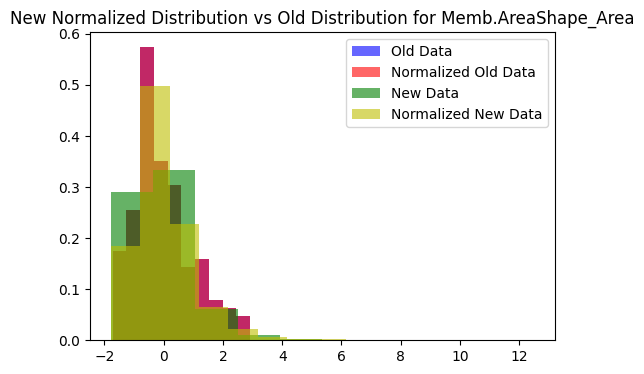

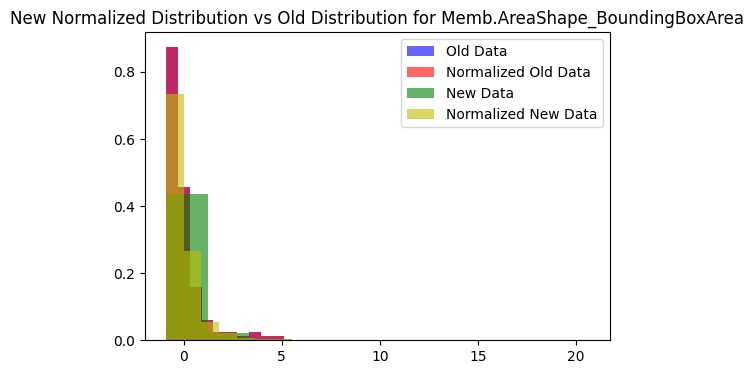

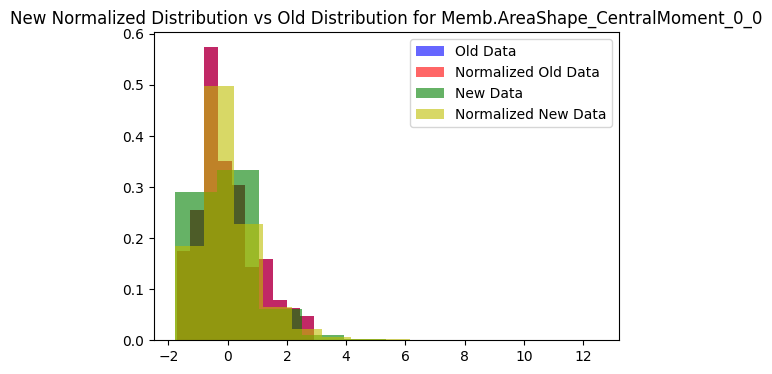

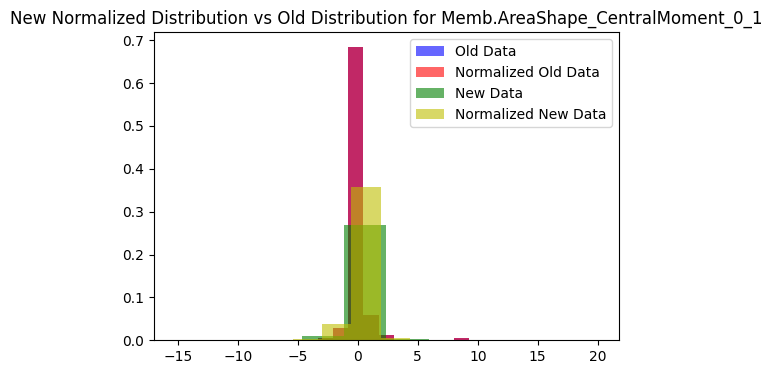

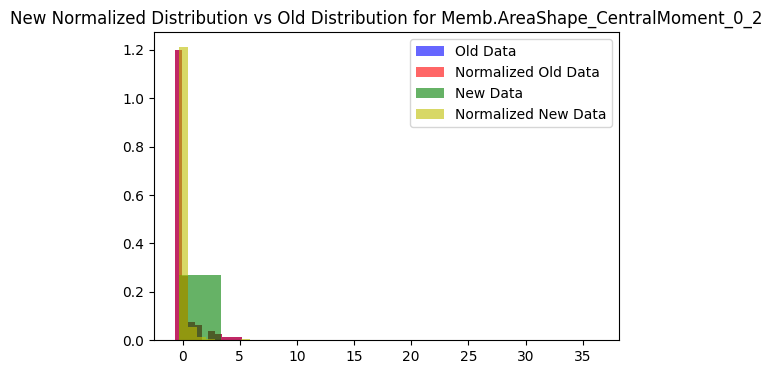

In [13]:
# Normalization Method 2

# Initialize normalized dataframes
X_old_normalized_2 = pd.DataFrame(X_old_scaled)
X_new_normalized_2 = pd.DataFrame(X_new_scaled)

# Save mean and std dev of each feature to a df
# df has columns: Mean, Std Dev and Index: Features
X_old_normalized_method_2_feature_stats = pd.DataFrame(index=X_old.columns, columns=['Mean', 'Std Dev'])
X_new_normalized_method_2_feature_stats = pd.DataFrame(index=X_new.columns, columns=['Mean', 'Std Dev'])

# Normalize feature-wise
for feature in X_old_scaled_df.columns:
    if feature in columns_to_skip:
        continue
    
    # Estimate parameters of the normal distribution
    mu, sigma = norm.fit(X_old_scaled_df[feature])

    # Normalize the feature in old and new data
    X_old_normalized_2[feature] = (X_old_normalized_2[feature] - mu) / sigma
    X_old_normalized_2[feature] = norm.ppf(norm.cdf(X_old_normalized_2[feature], loc=mu, scale=sigma), loc=mu, scale=sigma)  # Map to fit distribution
    X_old_normalized_2[feature] = X_old_normalized_2[feature].replace([np.inf, -np.inf], [X_old_scaled_df[feature].max(), X_old_scaled_df[feature].min()])

    # Estimate parameters of the normal distribution
    mu, sigma = norm.fit(X_new_scaled_df[feature])
    
    X_new_normalized_2[feature] = (X_new_normalized_2[feature] - mu) / sigma
    X_new_normalized_2[feature] = norm.ppf(norm.cdf(X_new_normalized_2[feature], loc=mu, scale=sigma), loc=mu, scale=sigma)  # Map to fit distribution
    X_new_normalized_2[feature] = X_new_normalized_2[feature].replace([np.inf, -np.inf], [X_old_scaled_df[feature].max(), X_old_scaled_df[feature].min()])

    # Save the mean and std for the normalized old data
    feature_name = X_old.columns[feature]
    mu, sigma = norm.fit(X_old_normalized_2[feature])
    X_old_normalized_method_2_feature_stats.loc[feature_name] = [mu, sigma]

    # Save the mean and std for the normalized new data
    mu, sigma = norm.fit(X_new_normalized_2[feature])
    X_new_normalized_method_2_feature_stats.loc[feature_name] = [mu, sigma]

# Print out stats
print("Normalized Old Data Stats:\n", X_old_normalized_method_2_feature_stats.head())
print("\nNormalized New Data Stats:\n", X_new_normalized_method_2_feature_stats.head())
# Save stats
X_old_normalized_method_2_feature_stats.to_csv('111524old_data_normalized_method_two_feature_stats.csv')
X_new_normalized_method_2_feature_stats.to_csv('111524new_data_normalized_method_two_feature_stats.csv')

# Plot if first 5 features
for feature in range(5):
    # Plot old data distribution
    plt.figure(figsize=(6, 4))
    plt.hist(X_old_scaled_df[feature], bins=10, density=True, alpha=0.6, color='b', label="Old Data")
    plt.hist(X_old_normalized_2[feature], bins=10, density=True, alpha=0.6, color='r', label="Normalized Old Data")
    plt.hist(X_new_scaled_df[feature], bins=10, density=True, alpha=0.6, color='g', label="New Data")
    plt.hist(X_new_normalized_2[feature], bins=10, density=True, alpha=0.6, color='y', label="Normalized New Data")
    plt.title(f"New Normalized Distribution vs Old Distribution for {X_old.columns[feature]}")
    plt.legend()
    plt.show()

### Redraw PCA on Normalized Old Data

In [14]:
# PCA of Old Data

pca_old_normalized = PCA(n_components=2)
X_old_normalized_pca = pca_old_normalized.fit_transform(X_old_normalized_2)

# X_pca would have a shape of (n_samples, n_components)
print("n_samples = ", X_old_scaled.shape[0])
print("X_pca shape: ", X_old_normalized_pca.shape)

# y = annotation
y = final_combined_data1['Annotation'].values

# Print out explained variance ratio
print("Explained variance ratio: ", pca_old_normalized.explained_variance_ratio_)

n_samples =  135
X_pca shape:  (135, 2)
Explained variance ratio:  [0.21576191 0.09016411]


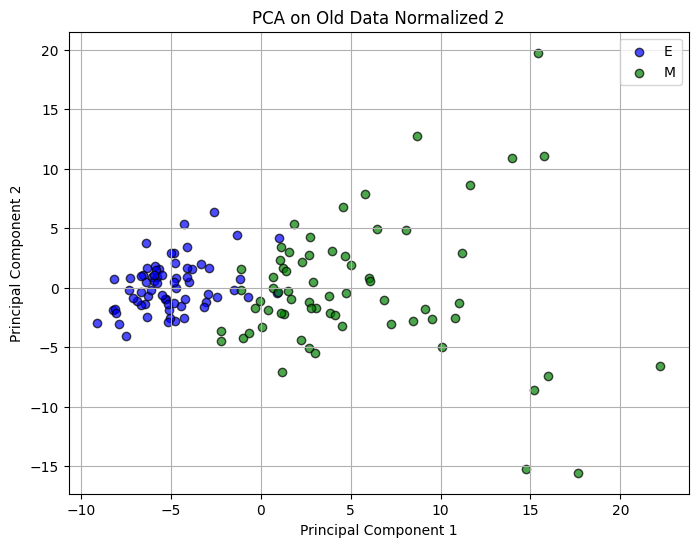

In [15]:
# plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_old_normalized_pca[y == 'E', 0], X_old_normalized_pca[y == 'E', 1], c='blue', label='E', alpha=0.7, edgecolor='k')
plt.scatter(X_old_normalized_pca[y == 'M', 0], X_old_normalized_pca[y == 'M', 1], c='green', label='M', alpha=0.7, edgecolor='k')
plt.title('PCA on Old Data Normalized 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/pca_on_old_normalized_data.png", format='png', bbox_inches='tight')
plt.close()

### Apply PCA Space to New Normalized Data

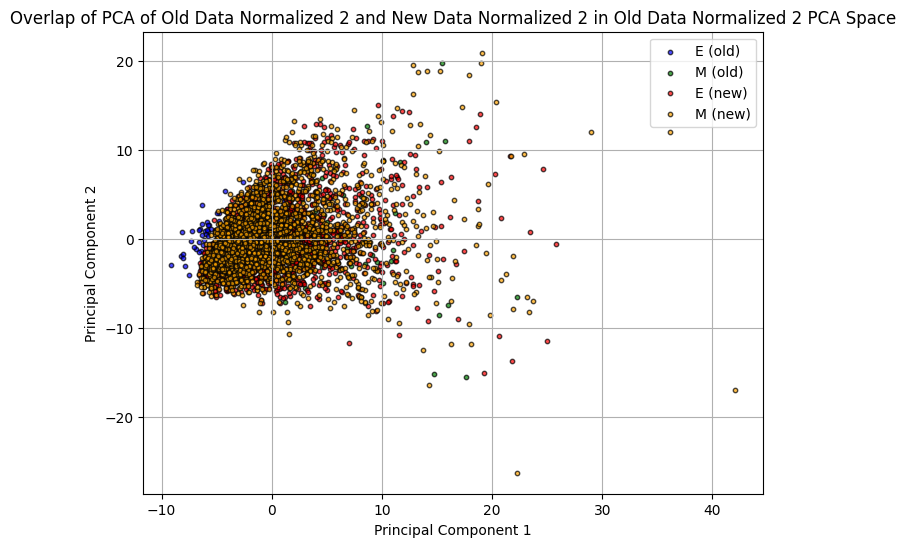

In [16]:
# Transform the old and new data using the fitted PCA
X_new_applied_to_pca_old_normalized = pca_old_normalized.transform(X_new_normalized_2)  # New data projected into the old PCA space

# y = annotation
y_new = final_combined_data2['Annotation'].values

# Compare the PCA results of the old and new data
plt.figure(figsize=(8, 6))
plt.scatter(X_old_normalized_pca[y == 'E', 0], X_old_normalized_pca[y == 'E', 1], c='blue', label='E (old)', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_old_normalized_pca[y == 'M', 0], X_old_normalized_pca[y == 'M', 1], c='green', label='M (old)', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_new_applied_to_pca_old_normalized[y_new == 'E', 0], X_new_applied_to_pca_old_normalized[y_new == 'E', 1], c='red', label='E (new)', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_new_applied_to_pca_old_normalized[y_new == 'M', 0], X_new_applied_to_pca_old_normalized[y_new == 'M', 1], c='orange', label='M (new)', alpha=0.7, edgecolor='k', s=10)
plt.title('Overlap of PCA of Old Data Normalized 2 and New Data Normalized 2 in Old Data Normalized 2 PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/compare_pca_old_normalized_2_and_pca_new_normalized_2_in_old_normalized_2_space.png", format='png', bbox_inches='tight')
plt.close()

## Logistic Regression on Normalized New Data using Method 1

### Fit and Predict

In [74]:
y_old = final_combined_data1['Annotation'].values
y_new = final_combined_data2['Annotation'].values

In [73]:
# Create Logistic Regression model
lr1 = LogisticRegression(random_state=42)
lr1.fit(X_old_scaled, y_old)

# Save the model
joblib.dump(lr1, '111924lr_model.pkl')

# Predict
y_pred = lr1.predict(X_new_normalized_1)

# Compute the confusion matrix
cm = confusion_matrix(y_new, y_pred, labels=['E', 'M'])

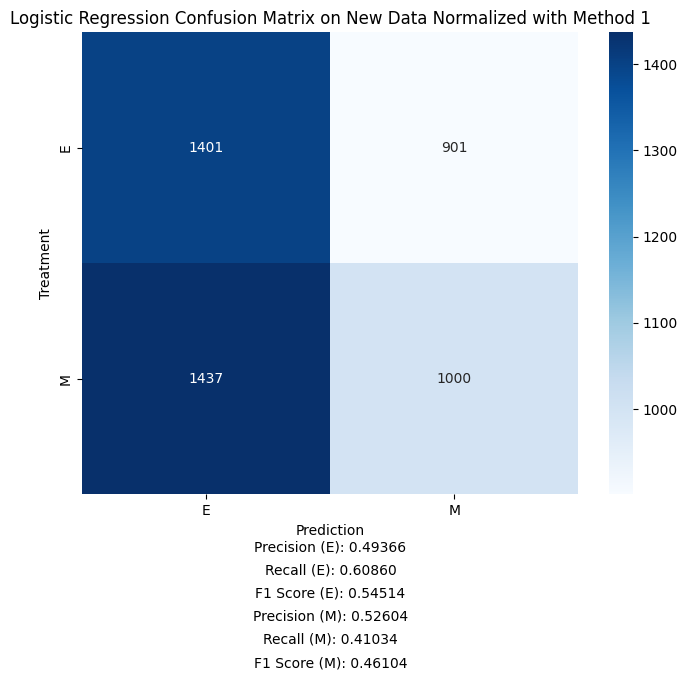

In [18]:
# Function for Plotting CM
def plot_cm(cm, y, y_pred, title, file_name):
    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['E', 'M'], yticklabels=['E', 'M'])
    plt.ylabel('Treatment')
    plt.xlabel('Prediction')
    plt.title(title)

    # Calculate precision, recall, and F1 score for each class
    precision_e = precision_score(y, y_pred, pos_label='E', average='binary')
    recall_e = recall_score(y, y_pred, pos_label='E', average='binary')
    f1_e = f1_score(y, y_pred, pos_label='E', average='binary')

    # Display metrics for 'E' state in the plot
    plt.text(0.5, -0.1, f"Precision (E): {precision_e:.5f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.5, -0.15, f"Recall (E): {recall_e:.5f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.5, -0.2, f"F1 Score (E): {f1_e:.5f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)

    # Calculate metrics for 'M' state
    precision_m = precision_score(y, y_pred, pos_label='M', average='binary')
    recall_m = recall_score(y, y_pred, pos_label='M', average='binary')
    f1_m = f1_score(y, y_pred, pos_label='M', average='binary')

    # Display metrics for 'M' state in the plot
    plt.text(0.5, -0.25, f"Precision (M): {precision_m:.5f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.5, -0.3, f"Recall (M): {recall_m:.5f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)
    plt.text(0.5, -0.35, f"F1 Score (M): {f1_m:.5f}", ha='center', va='top', transform=plt.gca().transAxes, fontsize=10)

    # Save the confusion matrix plot
    plt.savefig(file_name, format='png', bbox_inches='tight')
    plt.show()
    plt.close()  # Free memory by closing

plot_cm(cm, y_new, y_pred, 'Logistic Regression Confusion Matrix on New Data Normalized with Method 1', 'Metrics/cm_lr_model_on_new_normalized_method_1.png')

### Save Results

      ImageNumber  ObjectNumber  \
0               8             3   
1               8             4   
2               8             7   
3               8             9   
4               8            10   
...           ...           ...   
4734          271            27   
4735          271            28   
4736          271            30   
4737          271            31   
4738          271            32   

                                               BaseFile Prediction  EM_Score  
0     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.137105  
1     MyExpt_FilteredCells_with_Cell_Quality_annotation          M  0.803409  
2     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.154918  
3     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.110301  
4     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.260700  
...                                                 ...        ...       ...  
4734  MyExpt_FilteredCells

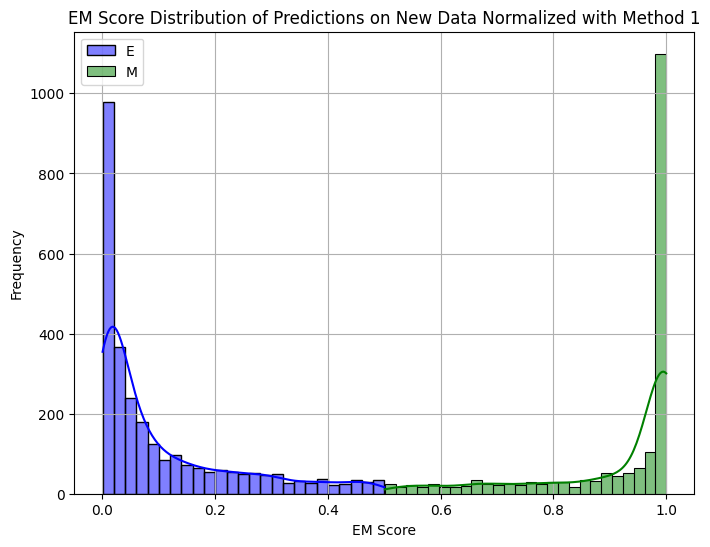

<Figure size 640x480 with 0 Axes>

In [19]:
# Calculate EM Score
y_probs = lr1.predict_proba(X_new_normalized_1)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
def save_results(y_pred, y_probs, file_name, plot_name):
    results = pd.DataFrame({'ImageNumber': final_combined_data2['ImageNumber'],
                            'ObjectNumber': final_combined_data2['ObjectNumber'],
                            'BaseFile': 'MyExpt_FilteredCells_with_Cell_Quality_annotation',
                            'Prediction': y_pred,
                            'EM_Score': y_probs})

    # Print results
    print(results)

    # Save results
    results.to_csv(file_name, index=False)

    # plot em score
    plt.figure(figsize=(8, 6))
    sns.histplot(results[results['Prediction'] == 'E']['EM_Score'], kde=True, color='b', label='E')
    sns.histplot(results[results['Prediction'] == 'M']['EM_Score'], kde=True, color='g', label='M')
    plt.title('EM Score Distribution of Predictions on New Data Normalized with Method 1')
    plt.xlabel('EM Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
    # save plot
    plt.savefig(plot_name, format='png', bbox_inches='tight')

save_results(y_pred, y_probs, '111924results_lr_model_on_new_normalized_method_1.csv', 'Metrics/lr_on_new_data_norm_1_em_score_distribution.png')

## Decision Tree on Normalized New Data using Method 1

### Fit and Predict

In [20]:
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_old_scaled, y_old)

# Save the model
joblib.dump(dt1, '111924dt_model.pkl')

['111924dt_model.pkl']

In [21]:
# Predict the test set
y_pred = dt1.predict(X_new_normalized_1)

# Compute the confusion matrix
cm = confusion_matrix(y_new, y_pred, labels=['E', 'M'])

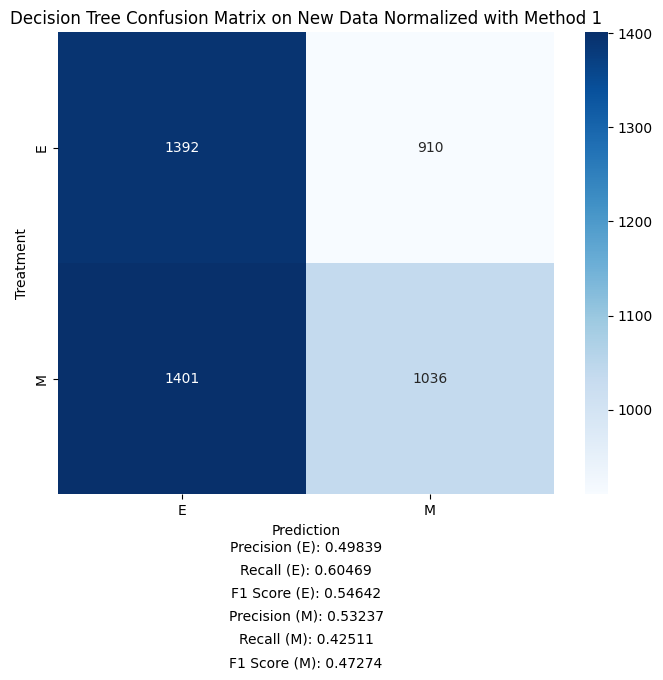

In [22]:
plot_cm(cm, y_new, y_pred, 'Decision Tree Confusion Matrix on New Data Normalized with Method 1', 'Metrics/cm_dt_model_on_new_normalized_method_1.png')

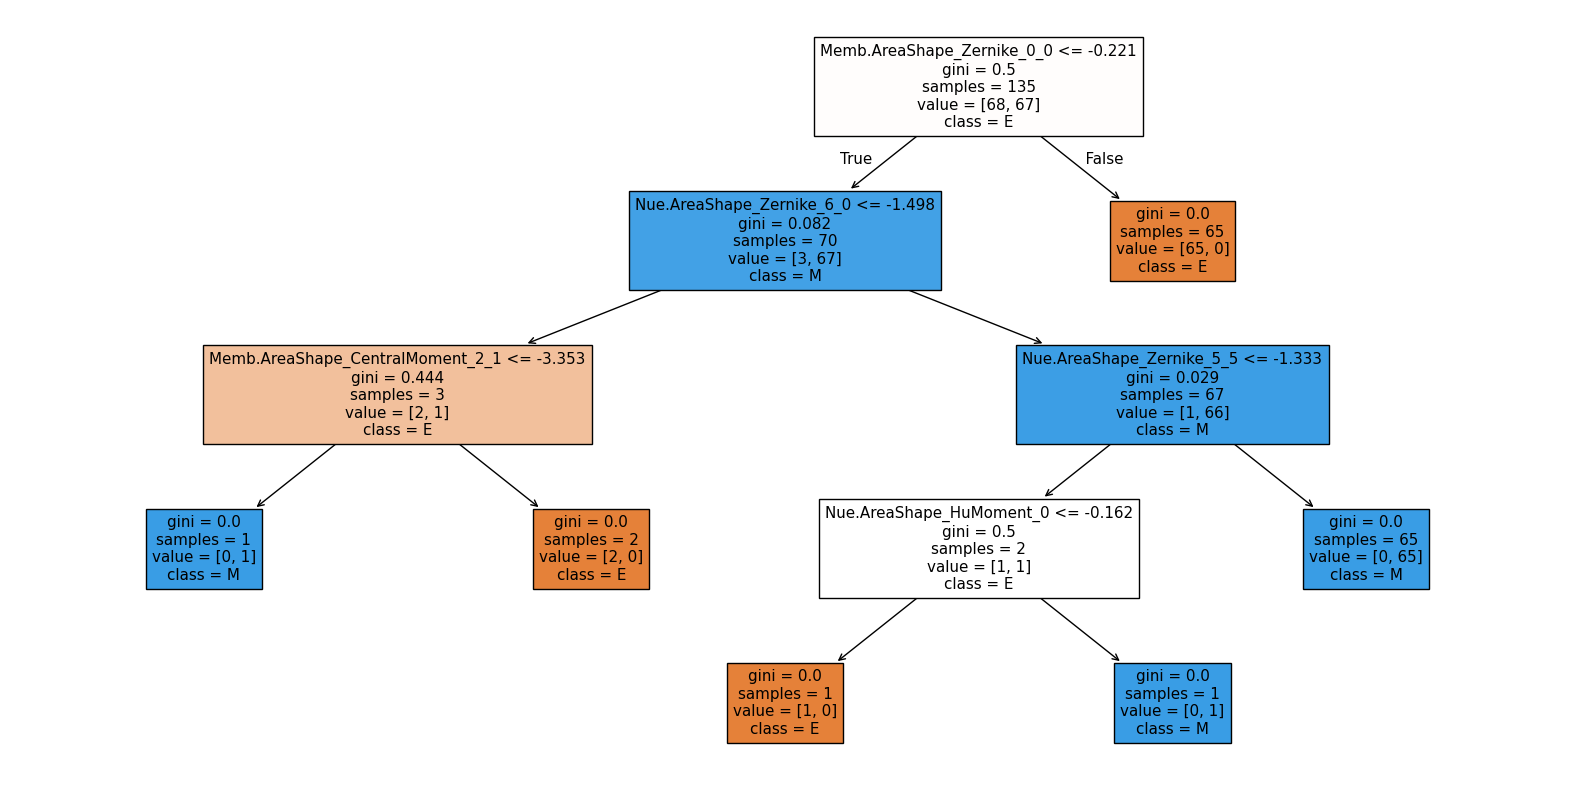

In [23]:
# show the trees for the model
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt1, filled=True, feature_names=X_old.columns, class_names=['E', 'M'])
plt.savefig('Metrics/dt_model_tree.png', format='png', bbox_inches='tight')
plt.show()
plt.close()

### Save Results

      ImageNumber  ObjectNumber  \
0               8             3   
1               8             4   
2               8             7   
3               8             9   
4               8            10   
...           ...           ...   
4734          271            27   
4735          271            28   
4736          271            30   
4737          271            31   
4738          271            32   

                                               BaseFile Prediction  EM_Score  
0     MyExpt_FilteredCells_with_Cell_Quality_annotation          M       1.0  
1     MyExpt_FilteredCells_with_Cell_Quality_annotation          M       1.0  
2     MyExpt_FilteredCells_with_Cell_Quality_annotation          E       0.0  
3     MyExpt_FilteredCells_with_Cell_Quality_annotation          E       0.0  
4     MyExpt_FilteredCells_with_Cell_Quality_annotation          E       0.0  
...                                                 ...        ...       ...  
4734  MyExpt_FilteredCells

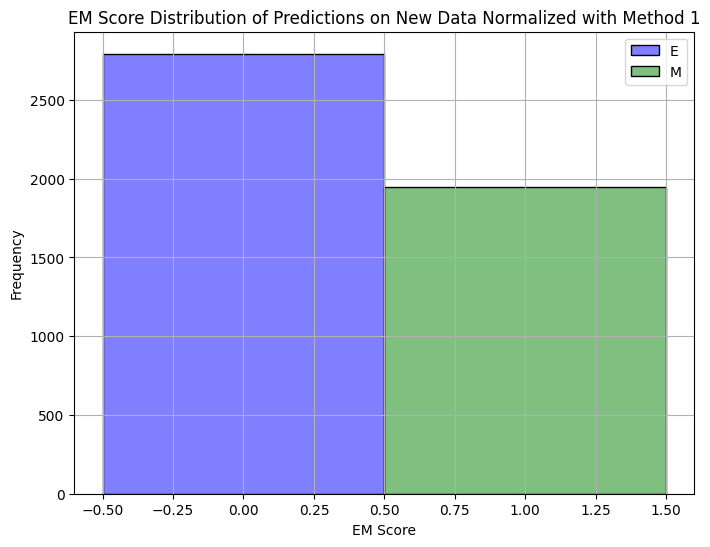

<Figure size 640x480 with 0 Axes>

In [24]:
# Calculate EM Score
y_probs = dt1.predict_proba(X_new_normalized_1)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
save_results(y_pred, y_probs, '111924results_dt_model_on_new_normalized_method_1.csv', 'Metrics/dt_on_new_data_norm_1_em_score_distribution.png')

## Logistic Regression on Normalized New Data using Method 2

### Fit and Predict

In [25]:
# Predict the test set
lr2 = LogisticRegression(random_state=42)
lr2.fit(X_old_normalized_2, y_old)
y_pred = lr2.predict(X_new_normalized_2)

# Compute the confusion matrix
cm = confusion_matrix(y_new, y_pred, labels=['E', 'M'])

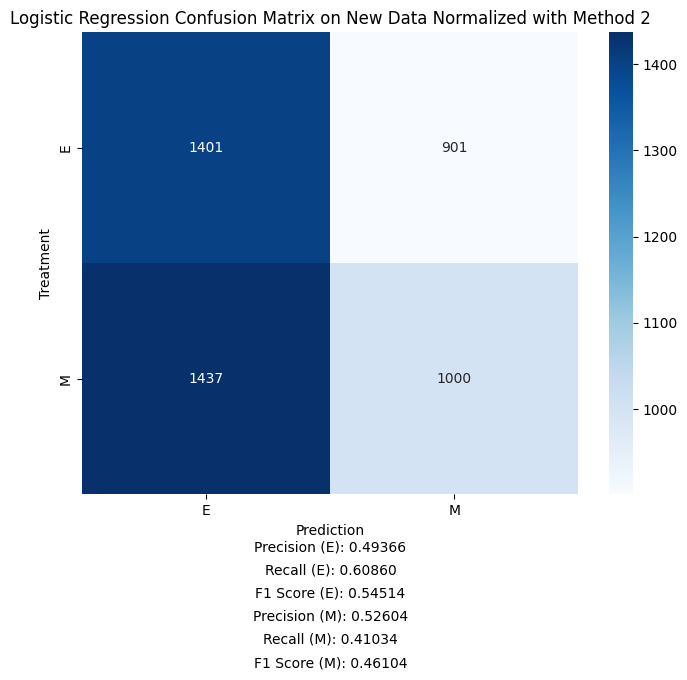

In [26]:
plot_cm(cm, y_new, y_pred, 'Logistic Regression Confusion Matrix on New Data Normalized with Method 2', 'Metrics/cm_lr_model_on_new_normalized_method_2.png')

### Top Features

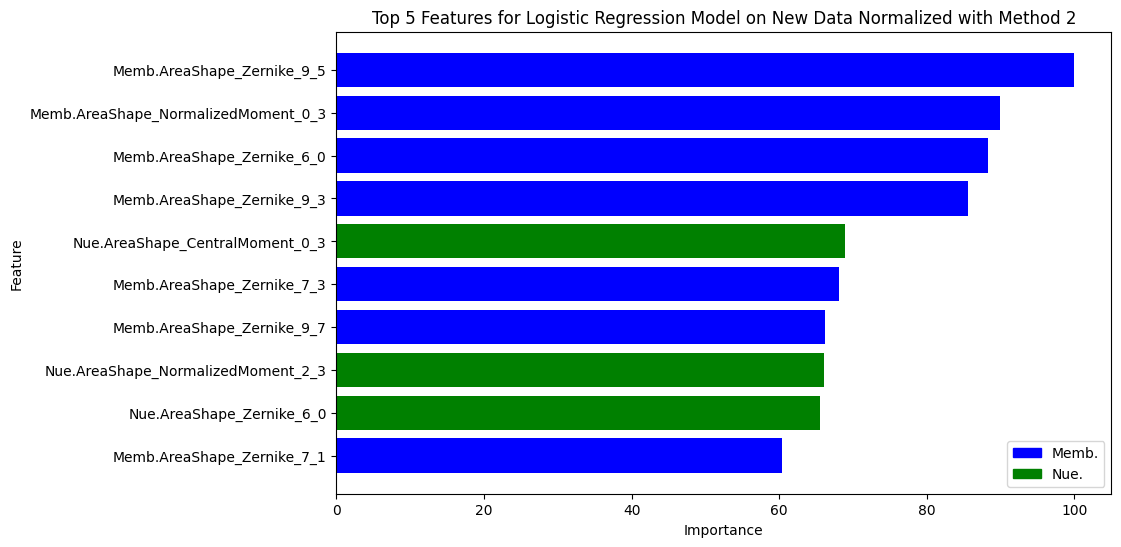

In [66]:
# Top Features
def top_features(model, title, file_name, n=10):
    # Get the feature importance
    # if the model is a logistic regression model
    if 'LogisticRegression' in str(type(model)):
        feature_importance = model.coef_[0]
    else:
        feature_importance = model.feature_importances_

    feature_importance = 100.0 * (feature_importance / feature_importance.max())

    # Create a df for better visualization
    features_df = pd.DataFrame({
        'Feature': X_new.columns,
        'Importance': feature_importance
    })

    # Sort the DataFrame by importance and keep only the top 10
    top_features_df = features_df.sort_values(by='Importance', ascending=False).head(n)

    # Define colors based on feature names
    colors = ['blue' if 'Memb.' in feature else 'green' for feature in top_features_df['Feature']]
    # Plot the top 10 feature importances with separate colors
    plt.figure(figsize=(10, 6))
    plt.barh(top_features_df['Feature'], top_features_df['Importance'], color=colors)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.gca().invert_yaxis()
    # Create custom legend handles
    blue_patch = mpatches.Patch(color='blue', label='Memb.')
    green_patch = mpatches.Patch(color='green', label='Nue.')
    # Add legend to the plot
    plt.legend(handles=[blue_patch, green_patch])
    plt.show()
    # Save the feature importances plot
    plt.savefig(file_name, format='png', bbox_inches='tight')
    plt.close()  # Free memory by closing figure

top_features(lr2, 'Top 5 Features for Logistic Regression Model on New Data Normalized with Method 2', 'Metrics/top_features_lr_on_new_normalized_data_2.png')

### Save Results

      ImageNumber  ObjectNumber  \
0               8             3   
1               8             4   
2               8             7   
3               8             9   
4               8            10   
...           ...           ...   
4734          271            27   
4735          271            28   
4736          271            30   
4737          271            31   
4738          271            32   

                                               BaseFile Prediction  EM_Score  
0     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.137105  
1     MyExpt_FilteredCells_with_Cell_Quality_annotation          M  0.803409  
2     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.154918  
3     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.110300  
4     MyExpt_FilteredCells_with_Cell_Quality_annotation          E  0.260700  
...                                                 ...        ...       ...  
4734  MyExpt_FilteredCells

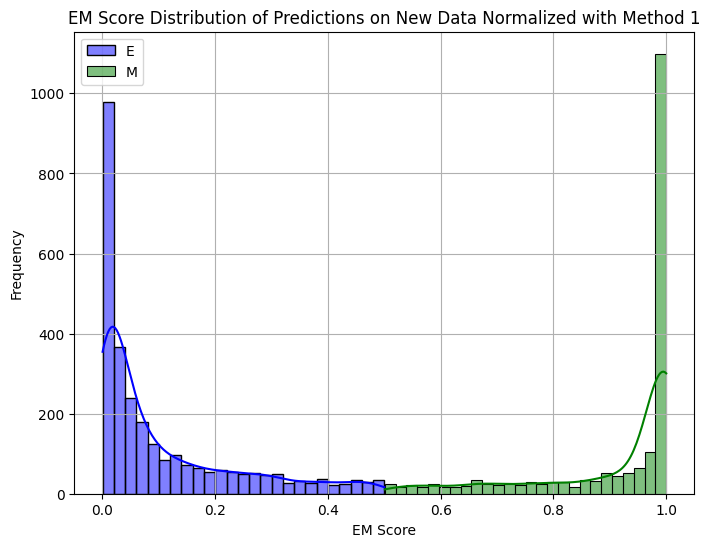

<Figure size 640x480 with 0 Axes>

In [28]:
# Calculate EM Score
y_probs = lr2.predict_proba(X_new_normalized_2)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
save_results(y_pred, y_probs, '111924results_lr_model_on_new_normalized_method_2.csv', 'Metrics/lr_on_new_data_norm_2_em_score_distribution.png')

## Decision Tree on Normalized New Data using Method 2

### Fit and Predict

In [29]:
# Predict the test set
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X_old_normalized_2, y_old)
y_pred = dt2.predict(X_new_normalized_2)

# Compute the confusion matrix
cm = confusion_matrix(y_new, y_pred, labels=['E', 'M'])

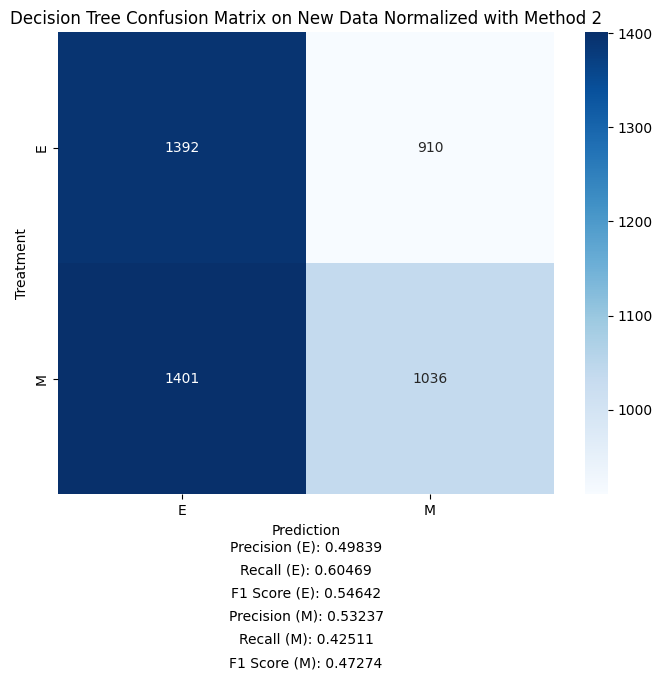

In [30]:
plot_cm(cm, y_new, y_pred, 'Decision Tree Confusion Matrix on New Data Normalized with Method 2', 'Metrics/cm_dt_model_on_new_normalized_method_2.png')

### Top Features

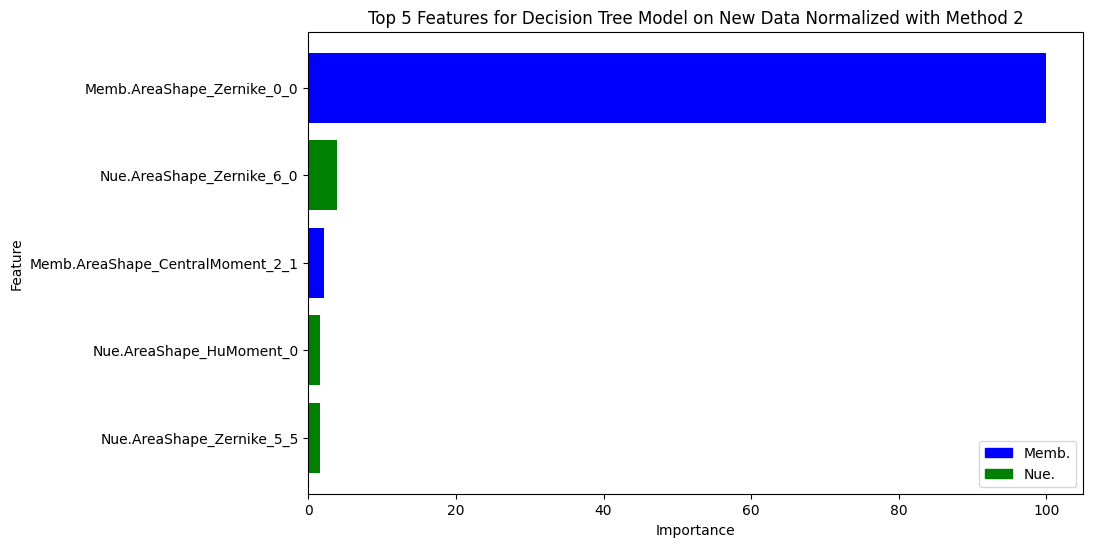

In [31]:
top_features(dt2, 'Top 5 Features for Decision Tree Model on New Data Normalized with Method 2', 'Metrics/top_features_dt_on_new_normalized_data_2.png')

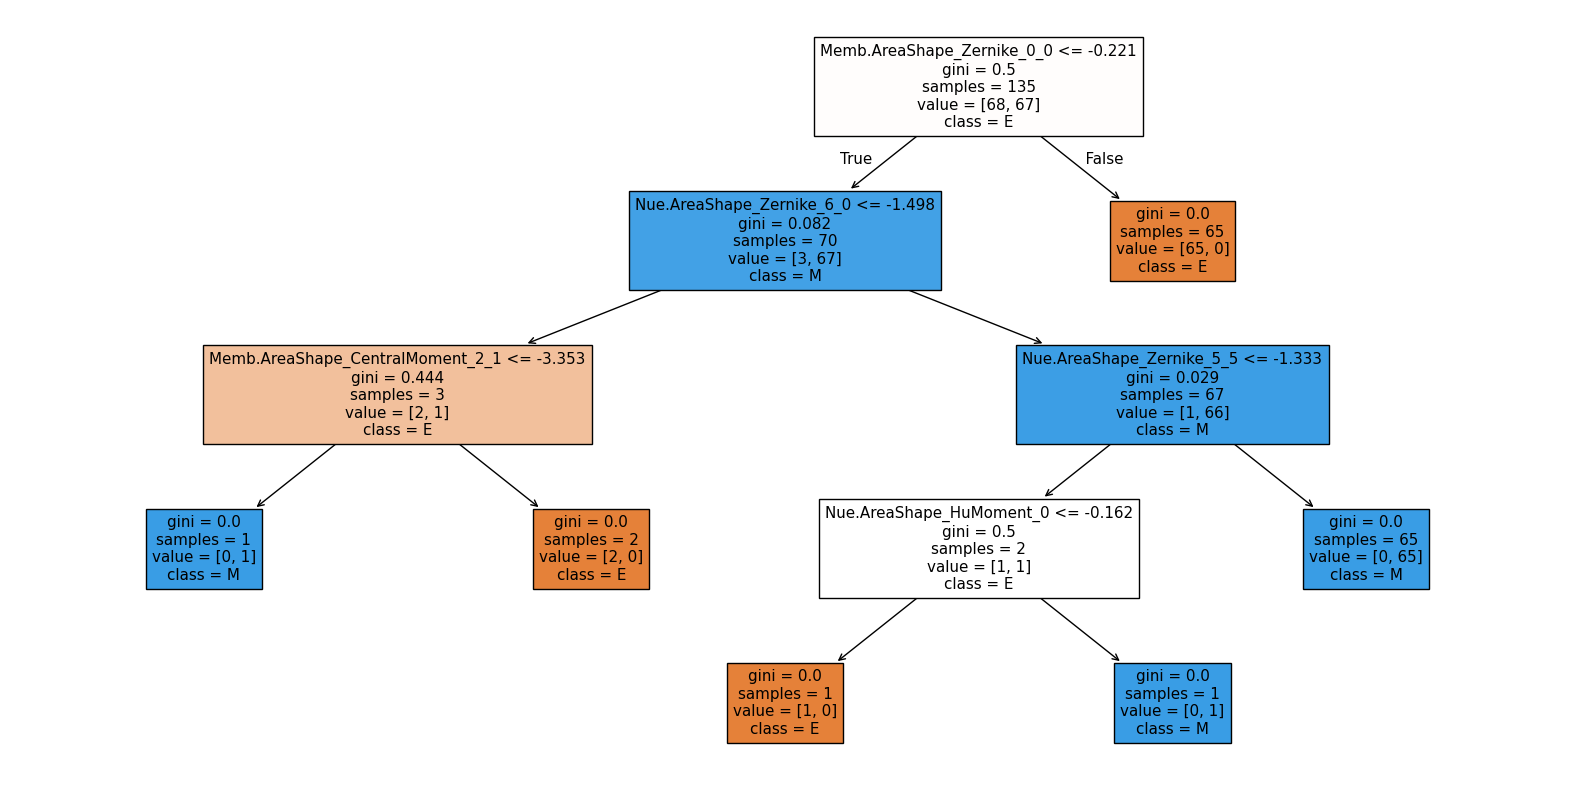

In [32]:
# Show the trees for the model
plt.figure(figsize=(20, 10))
plot_tree(dt2, filled=True, feature_names=X_old.columns, class_names=['E', 'M'])
plt.savefig('Metrics/dt_model_tree.png', format='png', bbox_inches='tight')
plt.show()
plt.close()

### Save Results

      ImageNumber  ObjectNumber  \
0               8             3   
1               8             4   
2               8             7   
3               8             9   
4               8            10   
...           ...           ...   
4734          271            27   
4735          271            28   
4736          271            30   
4737          271            31   
4738          271            32   

                                               BaseFile Prediction  EM_Score  
0     MyExpt_FilteredCells_with_Cell_Quality_annotation          M       1.0  
1     MyExpt_FilteredCells_with_Cell_Quality_annotation          M       1.0  
2     MyExpt_FilteredCells_with_Cell_Quality_annotation          E       0.0  
3     MyExpt_FilteredCells_with_Cell_Quality_annotation          E       0.0  
4     MyExpt_FilteredCells_with_Cell_Quality_annotation          E       0.0  
...                                                 ...        ...       ...  
4734  MyExpt_FilteredCells

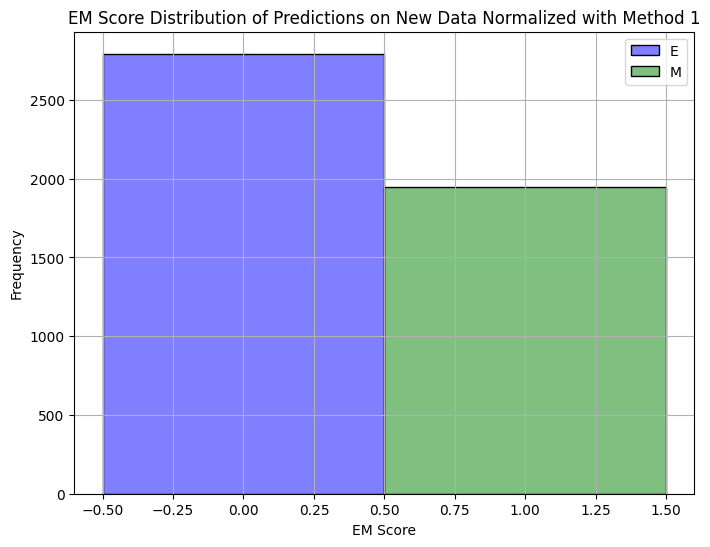

<Figure size 640x480 with 0 Axes>

In [33]:
# Calculate EM Score
y_probs = dt2.predict_proba(X_new_normalized_2)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
save_results(y_pred, y_probs, '111924results_dt_model_on_new_normalized_method_2.csv', 'Metrics/dt_on_new_data_norm_2_em_score_distribution.png')

## Train Models on New Data, Predict on Old Data

### LR

In [34]:
# Create Logistic Regression model
lr3 = LogisticRegression(random_state=42)
lr3.fit(X_new_scaled, y_new)

# Save the model
joblib.dump(lr3, '111924lr_model_on_new_data.pkl')

# Predict
y_pred = lr3.predict(X_old_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_old, y_pred, labels=['E', 'M'])

/home/tyoneyam/miniforge3/envs/jupyter_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


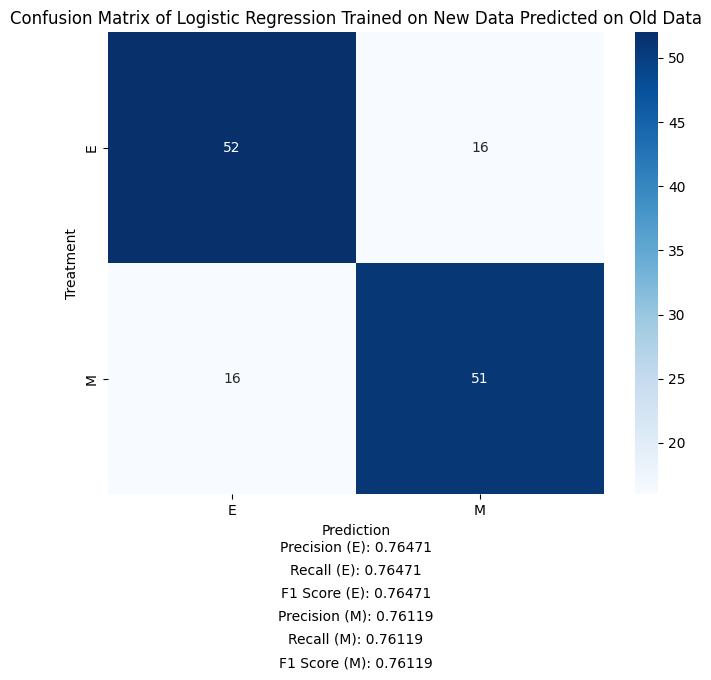

In [35]:
plot_cm(cm, y_old, y_pred, 'Confusion Matrix of Logistic Regression Trained on New Data Predicted on Old Data', 'Metrics/cm_lr_model_trained_on_new_predicted_on_old.png')

### DT

In [36]:
# Create Decision Tree model
dt3 = DecisionTreeClassifier(random_state=42)
dt3.fit(X_new_scaled, y_new)

# Save the model
joblib.dump(dt3, '111924dt_model_on_new_data.pkl')

# Predict
y_pred = dt3.predict(X_old_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_old, y_pred, labels=['E', 'M'])

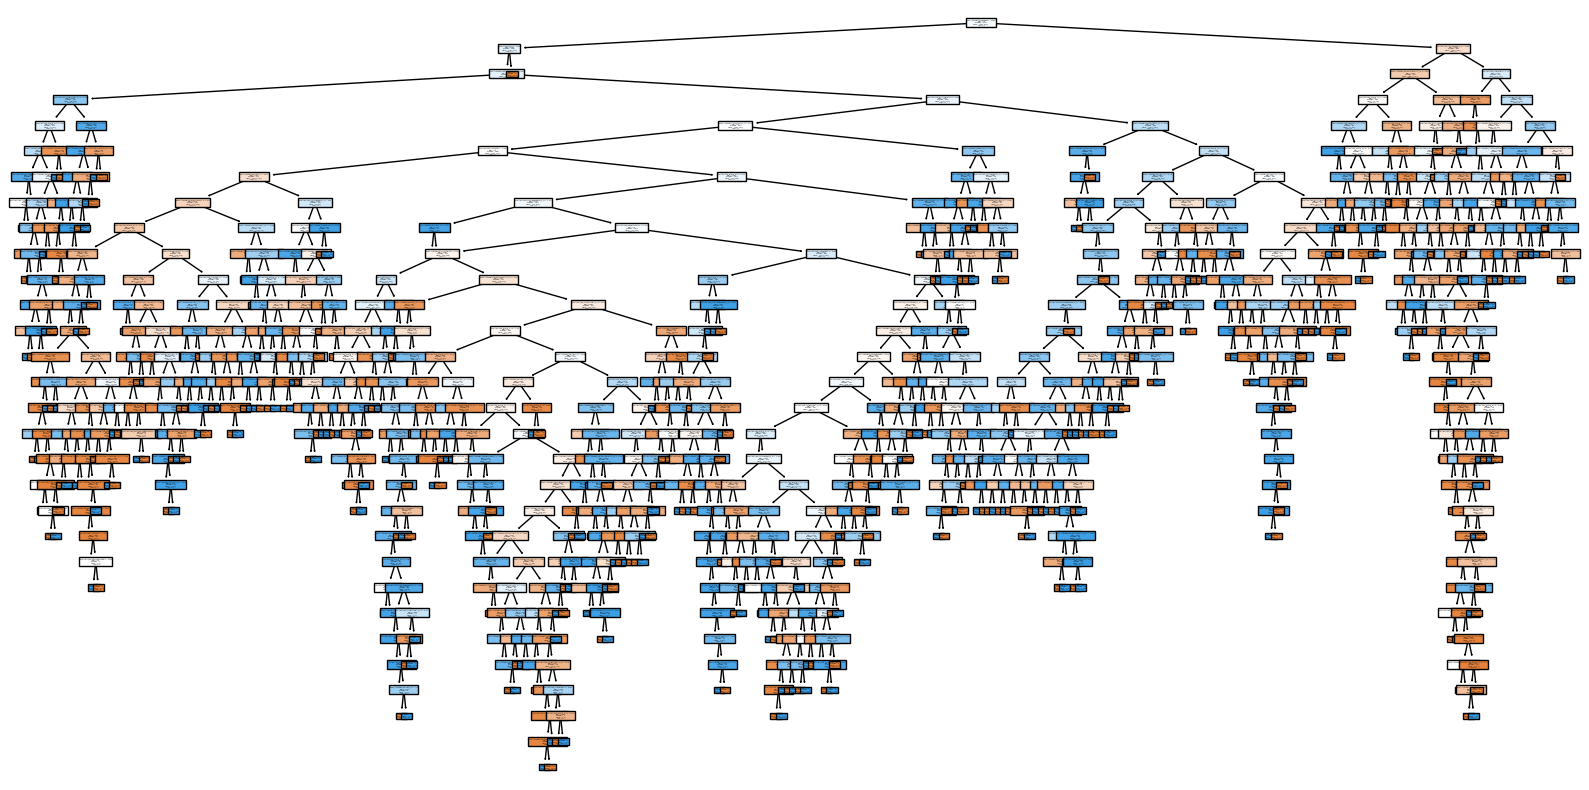

In [37]:
# Print the tree
plt.figure(figsize=(20, 10))
plot_tree(dt3, filled=True, feature_names=X_new.columns, class_names=['E', 'M'])
plt.savefig('Metrics/dt_model_trained_on_new_data_tree.png', format='png', bbox_inches='tight')
plt.show()
plt.close()

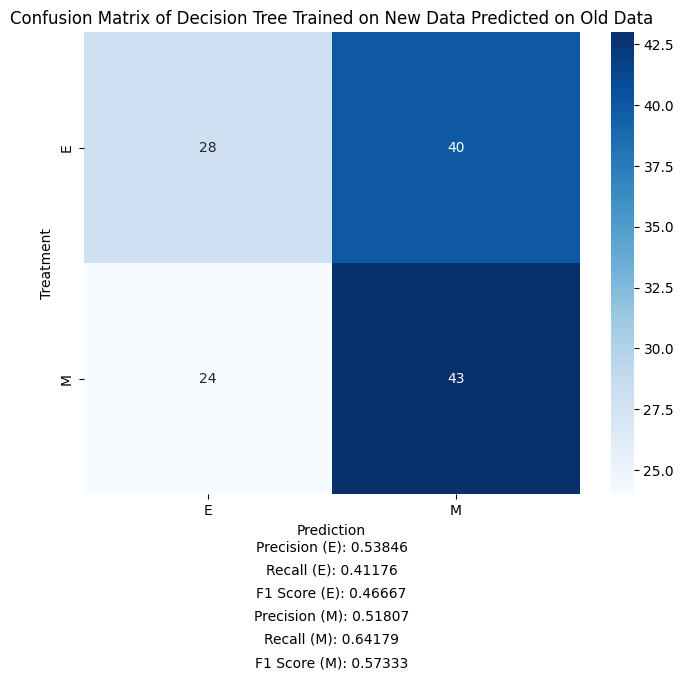

In [38]:
plot_cm(cm, y_old, y_pred, 'Confusion Matrix of Decision Tree Trained on New Data Predicted on Old Data', 'Metrics/cm_dt_model_trained_on_new_predicted_on_old.png')

## Models Trained On Old Data Predicted on Old Data

### Decision Tree Trained on Old Data

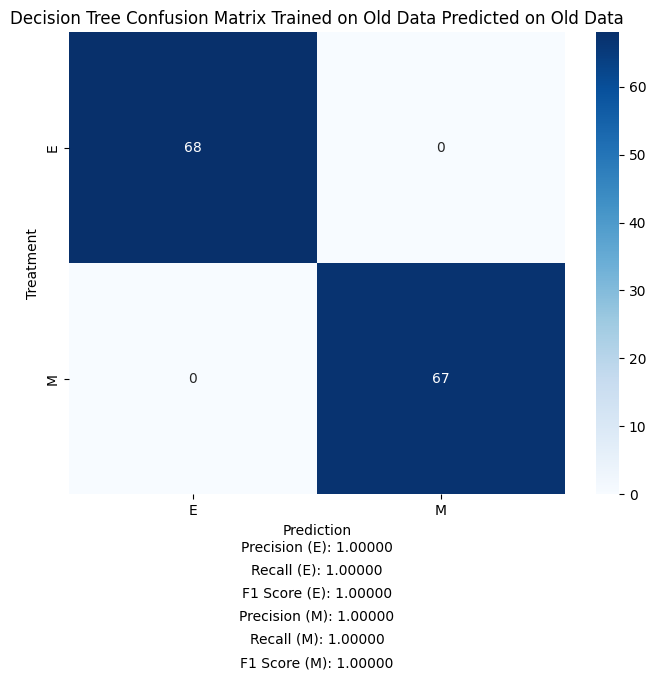

     ImageNumber  ObjectNumber  \
0              1             1   
1              1             3   
2              1             4   
3              1             8   
4              1            11   
..           ...           ...   
130            8            17   
131            8            18   
132            8            21   
133            8            26   
134            8            43   

                                             Base File Prediction  EM_Score  
0    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
1    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
2    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
3    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
4    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
..                                                 ...        ...       ...  
130                                         E

In [39]:
y_pred = dt1.predict(X_old_scaled)
cm = confusion_matrix(y_old, y_pred, labels=['E', 'M'])
plot_cm(cm, y_old, y_pred, 'Decision Tree Confusion Matrix Trained on Old Data Predicted on Old Data', 'Metrics/cm_dt_model_trained_on_old_data_predicted_on_old_data.png')

# Save result
# Calculate EM Score
y_probs = dt1.predict_proba(X_old_scaled)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
results = pd.DataFrame({'ImageNumber': final_combined_data1['ImageNumber'],
                        'ObjectNumber': final_combined_data1['ObjectNumber'],
                        'Base File': final_combined_data1['BaseFile'],
                        'Prediction': y_pred,
                        'EM_Score': y_probs})

# Print results
print(results)

# Save results
results.to_csv('111924results_dt_model_trained_on_old_data_predicted_on_old_data.csv', index=False)

### Logistic Regression Trained on Old Data

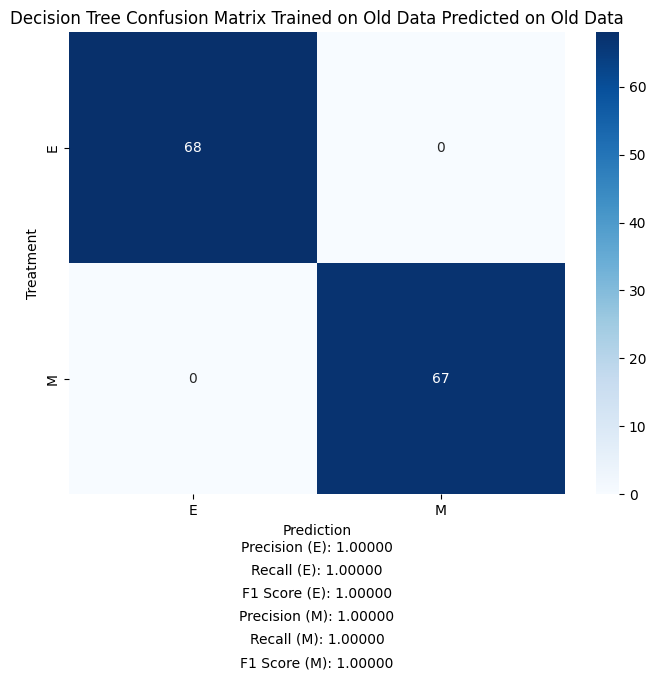

     ImageNumber  ObjectNumber  \
0              1             1   
1              1             3   
2              1             4   
3              1             8   
4              1            11   
..           ...           ...   
130            8            17   
131            8            18   
132            8            21   
133            8            26   
134            8            43   

                                             Base File Prediction  EM_Score  
0    MyExpt_FilteredCells_with_annotation_additiona...          M  0.999522  
1    MyExpt_FilteredCells_with_annotation_additiona...          M  0.999999  
2    MyExpt_FilteredCells_with_annotation_additiona...          M  0.999990  
3    MyExpt_FilteredCells_with_annotation_additiona...          M  0.991912  
4    MyExpt_FilteredCells_with_annotation_additiona...          M  0.983884  
..                                                 ...        ...       ...  
130                                         E

In [40]:
y_pred = lr1.predict(X_old_scaled)
cm = confusion_matrix(y_old, y_pred, labels=['E', 'M'])
plot_cm(cm, y_old, y_pred, 'Decision Tree Confusion Matrix Trained on Old Data Predicted on Old Data', 'Metrics/cm_dt_model_trained_on_old_data_predicted_on_old_data.png')

# Save result
# Calculate EM Score
y_probs = lr1.predict_proba(X_old_scaled)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
results = pd.DataFrame({'ImageNumber': final_combined_data1['ImageNumber'],
                        'ObjectNumber': final_combined_data1['ObjectNumber'],
                        'Base File': final_combined_data1['BaseFile'],
                        'Prediction': y_pred,
                        'EM_Score': y_probs})

# Print results
print(results)

# Save results
results.to_csv('111924results_lr_model_trained_on_old_data_predicted_on_old_data.csv', index=False)

### Decision Tree Trained on Old Data Normalized

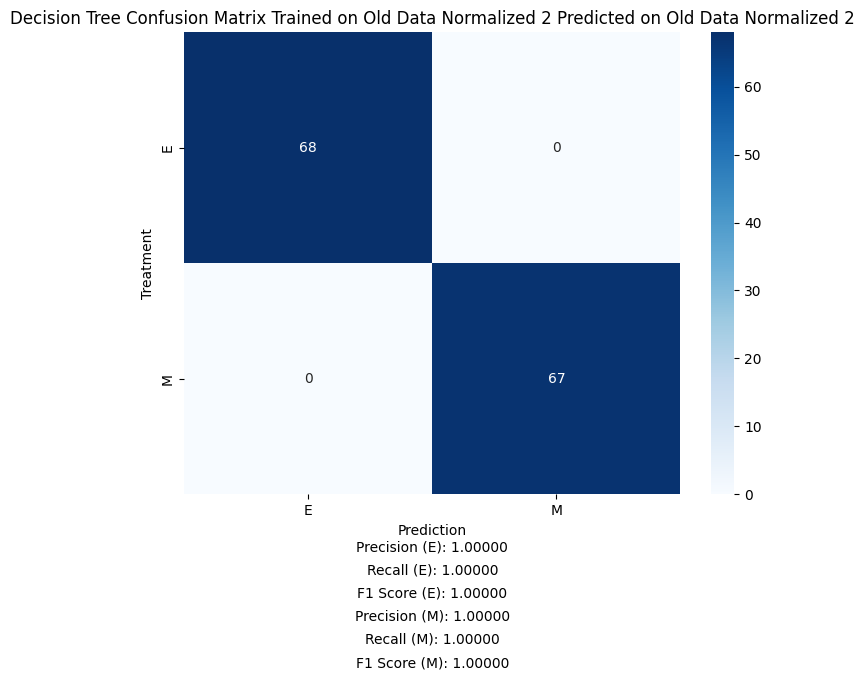

     ImageNumber  ObjectNumber  \
0              1             1   
1              1             3   
2              1             4   
3              1             8   
4              1            11   
..           ...           ...   
130            8            17   
131            8            18   
132            8            21   
133            8            26   
134            8            43   

                                             Base File Prediction  EM_Score  
0    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
1    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
2    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
3    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
4    MyExpt_FilteredCells_with_annotation_additiona...          M       1.0  
..                                                 ...        ...       ...  
130                                         E

In [41]:
y_pred = dt2.predict(X_old_normalized_2)
cm = confusion_matrix(y_old, y_pred, labels=['E', 'M'])
plot_cm(cm, y_old, y_pred, 'Decision Tree Confusion Matrix Trained on Old Data Normalized 2 Predicted on Old Data Normalized 2', 'Metrics/cm_dt_model_trained_on_old_data_predicted_on_old_data.png')

# Save result
# Calculate EM Score
y_probs = dt2.predict_proba(X_old_scaled)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
results = pd.DataFrame({'ImageNumber': final_combined_data1['ImageNumber'],
                        'ObjectNumber': final_combined_data1['ObjectNumber'],
                        'Base File': final_combined_data1['BaseFile'],
                        'Prediction': y_pred,
                        'EM_Score': y_probs})

# Print results
print(results)

# Save results
results.to_csv('111924results_dt_model_trained_on_old_data_normalized_predicted_on_old_data_normalized.csv', index=False)

### Logistic Regression Trained on Old Data Normalized 2

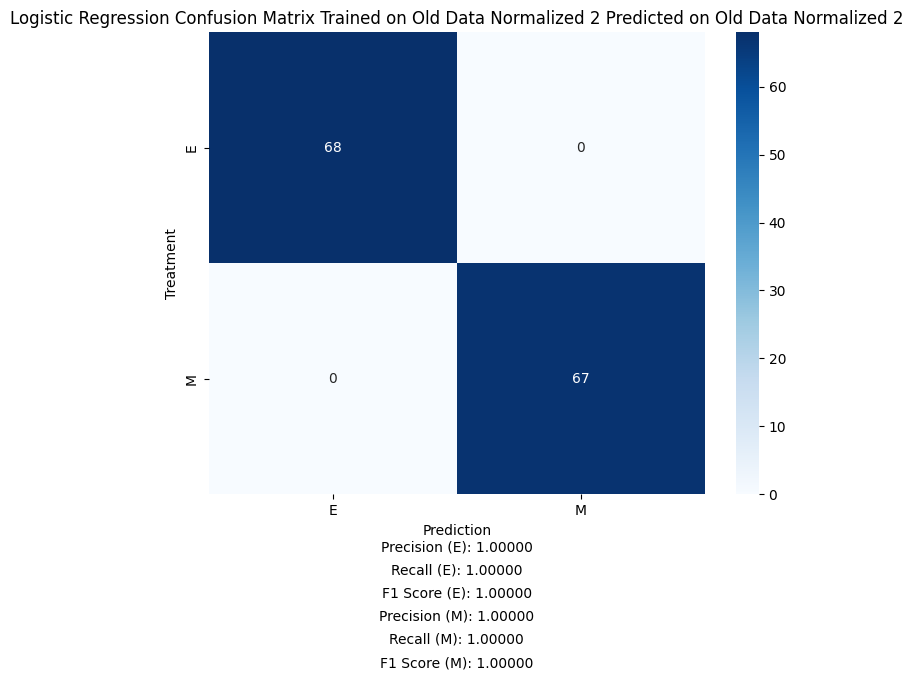

     ImageNumber  ObjectNumber  \
0              1             1   
1              1             3   
2              1             4   
3              1             8   
4              1            11   
..           ...           ...   
130            8            17   
131            8            18   
132            8            21   
133            8            26   
134            8            43   

                                             Base File Prediction  EM_Score  
0    MyExpt_FilteredCells_with_annotation_additiona...          M  0.999522  
1    MyExpt_FilteredCells_with_annotation_additiona...          M  0.999999  
2    MyExpt_FilteredCells_with_annotation_additiona...          M  0.999990  
3    MyExpt_FilteredCells_with_annotation_additiona...          M  0.991912  
4    MyExpt_FilteredCells_with_annotation_additiona...          M  0.983884  
..                                                 ...        ...       ...  
130                                         E

In [42]:
y_pred = lr2.predict(X_old_normalized_2)
cm = confusion_matrix(y_old, y_pred, labels=['E', 'M'])
plot_cm(cm, y_old, y_pred, 'Logistic Regression Confusion Matrix Trained on Old Data Normalized 2 Predicted on Old Data Normalized 2', 'Metrics/cm_dt_model_trained_on_old_data_predicted_on_old_data.png')

# Save result
# Calculate EM Score
y_probs = lr2.predict_proba(X_old_scaled)[:, 1]

# Save image/object#, treatment, prediction result, EM score into df
results = pd.DataFrame({'ImageNumber': final_combined_data1['ImageNumber'],
                        'ObjectNumber': final_combined_data1['ObjectNumber'],
                        'Base File': final_combined_data1['BaseFile'],
                        'Prediction': y_pred,
                        'EM_Score': y_probs})

# Print results
print(results)

# Save results
results.to_csv('111924results_lr_model_trained_on_old_data_normalized_predicted_on_old_data_normalized.csv', index=False)

## PCA on New Data
See whether the New Data separates well on PCA

### PCA on New Data

In [43]:
# PCA of Old Data

pca_new = PCA(n_components=2)
X_new_pca = pca_new.fit_transform(X_new_scaled)

# X_pca would have a shape of (n_samples, n_components)
print("n_samples = ", X_new_scaled.shape[0])
print("X_pca shape: ", X_new_pca.shape)

# y = annotation
y = final_combined_data2['Annotation'].values

# Print out explained variance ratio
print("Explained variance ratio: ", pca_old.explained_variance_ratio_)

n_samples =  4739
X_pca shape:  (4739, 2)
Explained variance ratio:  [0.21576205 0.0901637 ]


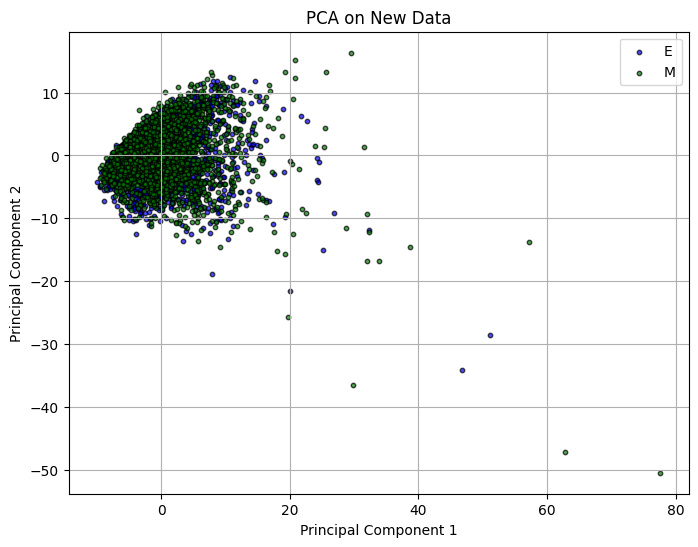

In [44]:
# plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_new_pca[y == 'E', 0], X_new_pca[y == 'E', 1], c='blue', label='E', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_new_pca[y == 'M', 0], X_new_pca[y == 'M', 1], c='green', label='M', alpha=0.7, edgecolor='k', s=10)
plt.title('PCA on New Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/pca_on_data2.png", format='png', bbox_inches='tight')
plt.close()

### Apply New Data PCA Space to Old Data

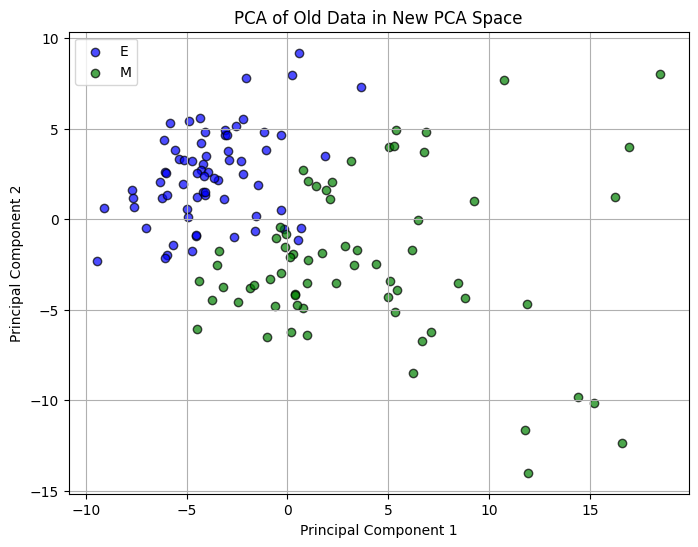

In [45]:
# Transform the old and new data using the fitted PCA
X_old_applied_to_pca_new = pca_new.transform(X_old_scaled)  # New data projected into the old PCA space

# y = annotation
y_old = final_combined_data1['Annotation'].values

# Compare the PCA results of the old and new data
plt.figure(figsize=(8, 6))
plt.scatter(X_old_applied_to_pca_new[y_old == 'E', 0], X_old_applied_to_pca_new[y_old == 'E', 1], c='blue', label='E', alpha=0.7, edgecolor='k')
plt.scatter(X_old_applied_to_pca_new[y_old == 'M', 0], X_old_applied_to_pca_new[y_old == 'M', 1], c='green', label='M', alpha=0.7, edgecolor='k')
plt.title('PCA of Old Data in New PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/pca_old_in_pca_new_space.png", format='png', bbox_inches='tight')
plt.close()

## PCA New Data Normalized with Method 2 and Apply It's Space to Old Data Normalized

### PCA for New Normalized 2

n_samples =  4739
X_pca shape:  (4739, 2)
Explained variance ratio:  [0.16573385 0.10276952]


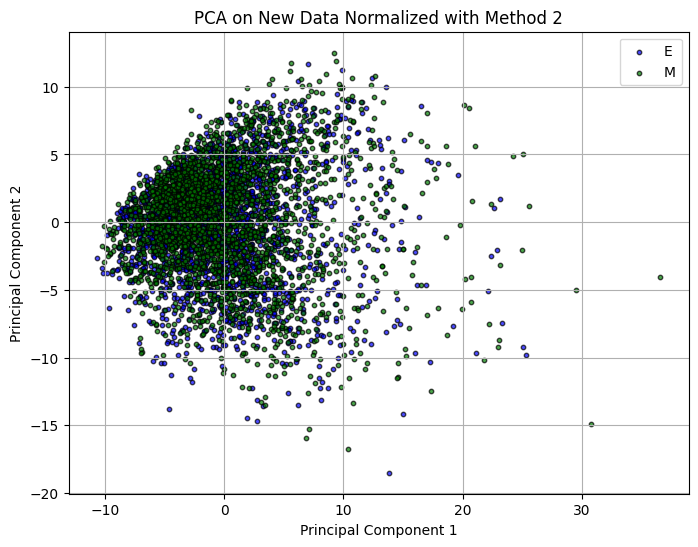

In [46]:
# PCA
pca_new_normalized = PCA(n_components=2)
X_new_normalized_pca = pca_new_normalized.fit_transform(X_new_normalized_2)

# X_pca would have a shape of (n_samples, n_components)
print("n_samples = ", X_new_normalized_2.shape[0])
print("X_pca shape: ", X_new_normalized_pca.shape)

# y = annotation
y = final_combined_data2['Annotation'].values

# Print out explained variance ratio
print("Explained variance ratio: ", pca_new_normalized.explained_variance_ratio_)
# plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_new_normalized_pca[y == 'E', 0], X_new_normalized_pca[y == 'E', 1], c='blue', label='E', alpha=0.7, edgecolor='k', s=10)
plt.scatter(X_new_normalized_pca[y == 'M', 0], X_new_normalized_pca[y == 'M', 1], c='green', label='M', alpha=0.7, edgecolor='k', s=10)
plt.title('PCA on New Data Normalized with Method 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/pca_on_new_data_normalized_2.png", format='png', bbox_inches='tight')
plt.close()


### Apply New Normalized 2 PCA Space to Old Data Normalized

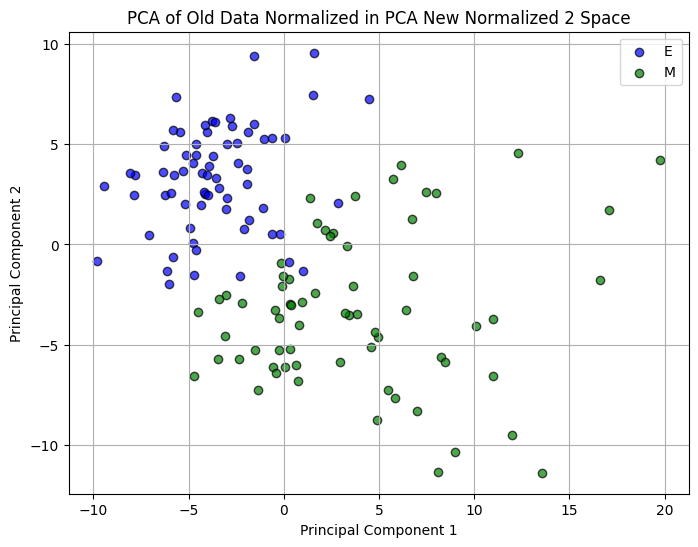

In [47]:
# Transform the old and new data using the fitted PCA
X_old_normalized_applied_to_pca_new_normalized = pca_new_normalized.transform(X_old_normalized_2)  # New data projected into the old PCA space

# y = annotation
y_old = final_combined_data1['Annotation'].values

# Compare the PCA results of the old and new data
plt.figure(figsize=(8, 6))
plt.scatter(X_old_normalized_applied_to_pca_new_normalized[y_old == 'E', 0], X_old_normalized_applied_to_pca_new_normalized[y_old == 'E', 1], c='blue', label='E', alpha=0.7, edgecolor='k')
plt.scatter(X_old_normalized_applied_to_pca_new_normalized[y_old == 'M', 0], X_old_normalized_applied_to_pca_new_normalized[y_old == 'M', 1], c='green', label='M', alpha=0.7, edgecolor='k')
plt.title('PCA of Old Data Normalized in PCA New Normalized 2 Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
# save plot
plt.savefig("Metrics/pca_old_normalized_in_new_normalized_pca_space.png", format='png', bbox_inches='tight')
plt.close()

## IDA on the Two New Normalized Datasets and Normalized Old Dataset

### New Data 1

#### Random Forest Classifier

In [48]:
# IDA on New Data Normalized Method 1
# Create an Randome Forest Classifier model
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_new_normalized_1, y_new)

RandomForestClassifier(random_state=42)

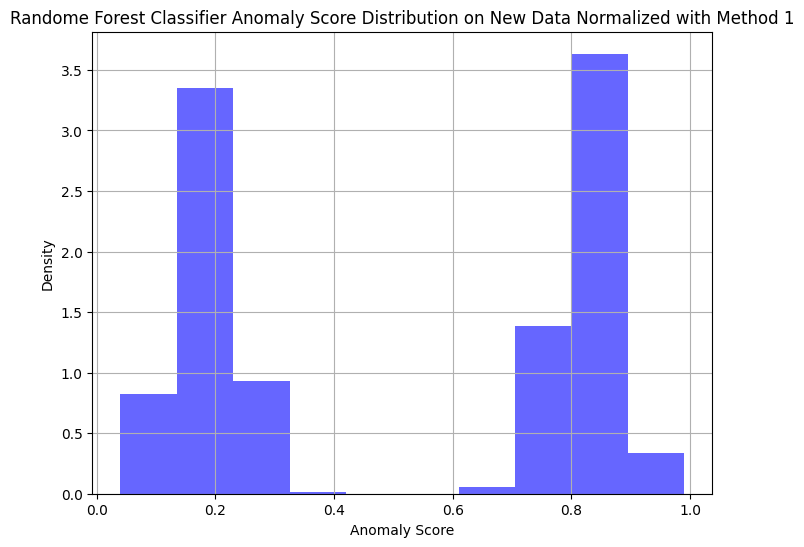

In [49]:
# Plot IDA
def plot_IDA(model, X, title, file_name):
    # Calculate the anomaly score
    anomaly_score = model.predict_proba(X)[:, 1]

    # Plot the anomaly score
    plt.figure(figsize=(8, 6))
    plt.hist(anomaly_score, bins=10, density=True, alpha=0.6, color='b')
    plt.title(title)
    plt.xlabel('Anomaly Score')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    # Save the IDA plot
    plt.savefig(file_name, format='png', bbox_inches='tight')
    plt.close()  # Free memory by closing figure

plot_IDA(rf1, X_new_normalized_1, 'Randome Forest Classifier Anomaly Score Distribution on New Data Normalized with Method 1', 'Metrics/ida_rf_on_new_data_norm_1.png')

#### Top Features

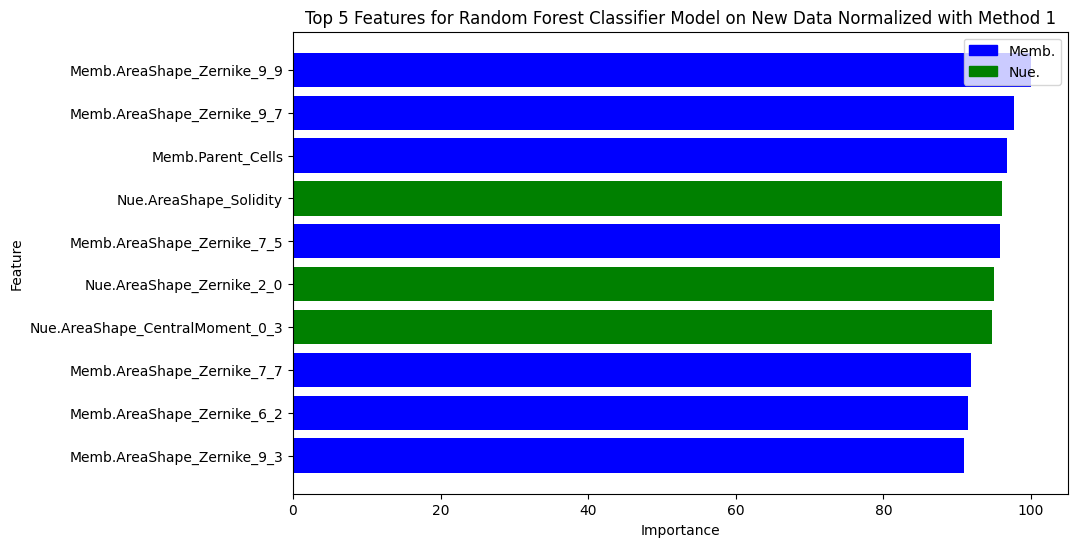

In [70]:
# Plot top features
top_features(rf1, 'Top 5 Features for Random Forest Classifier Model on New Data Normalized with Method 1', 'Metrics/top_features_rf_on_new_normalized_data_1.png')

### New Data 2

#### Random Forest Classifier

In [57]:
# Random Forest Classifier on New Data Normalized Method 2
# Create an Randome Forest Classifier model
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X_new_normalized_2, y_new)

RandomForestClassifier(random_state=42)

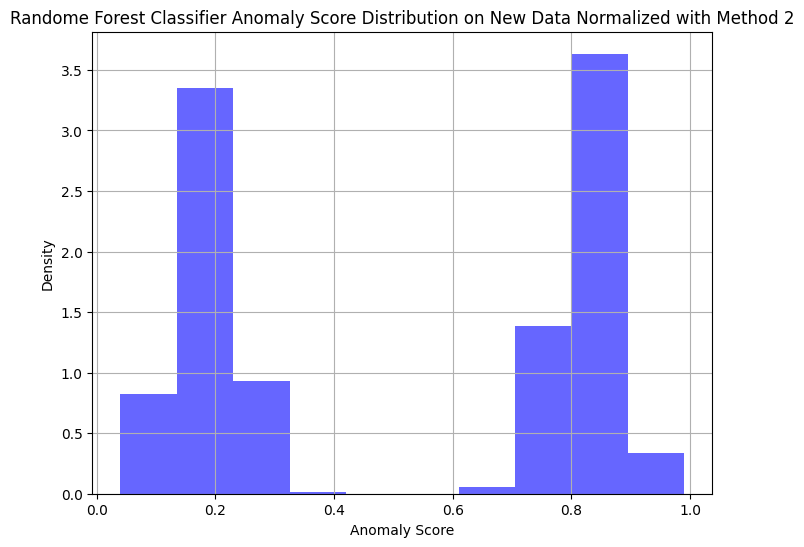

In [58]:
# Plot IDA
plot_IDA(rf2, X_new_normalized_2, 'Randome Forest Classifier Anomaly Score Distribution on New Data Normalized with Method 2', 'Metrics/ida_rf_on_new_data_norm_2.png')

#### Top Features

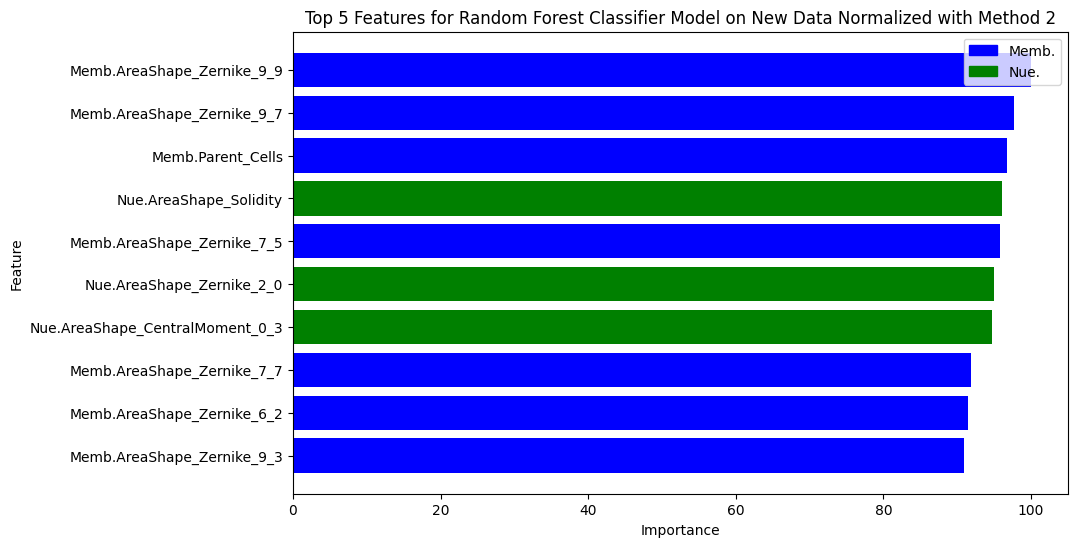

In [72]:
# Top Features
top_features(rf2, 'Top 5 Features for Random Forest Classifier Model on New Data Normalized with Method 2', 'Metrics/top_features_rf_on_new_normalized_data_2.png')

### Old Data

#### Random Forest Classifier

In [71]:
# rf on old data
# Create an Randome Forest Classifier model
rf3 = RandomForestClassifier(random_state=42)
rf3.fit(X_old_scaled, y_old)

RandomForestClassifier(random_state=42)

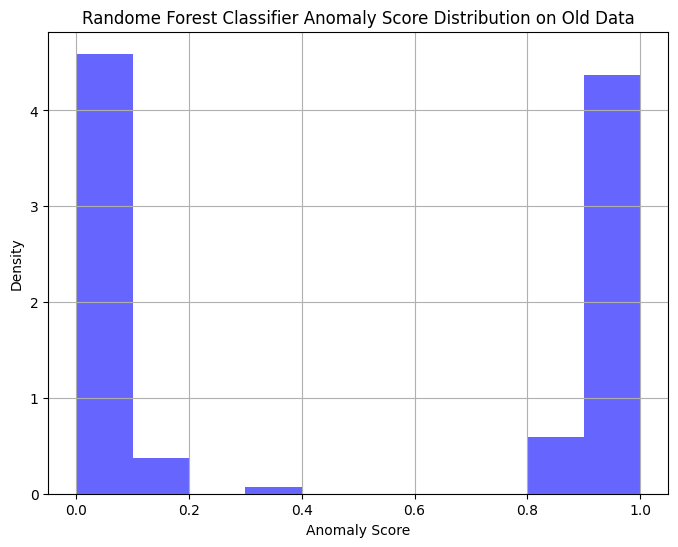

In [75]:
# Plot IDA
plot_IDA(rf3, X_old_scaled, 'Randome Forest Classifier Anomaly Score Distribution on Old Data', 'Metrics/ida_rf_on_old_data.png')

#### Top Features

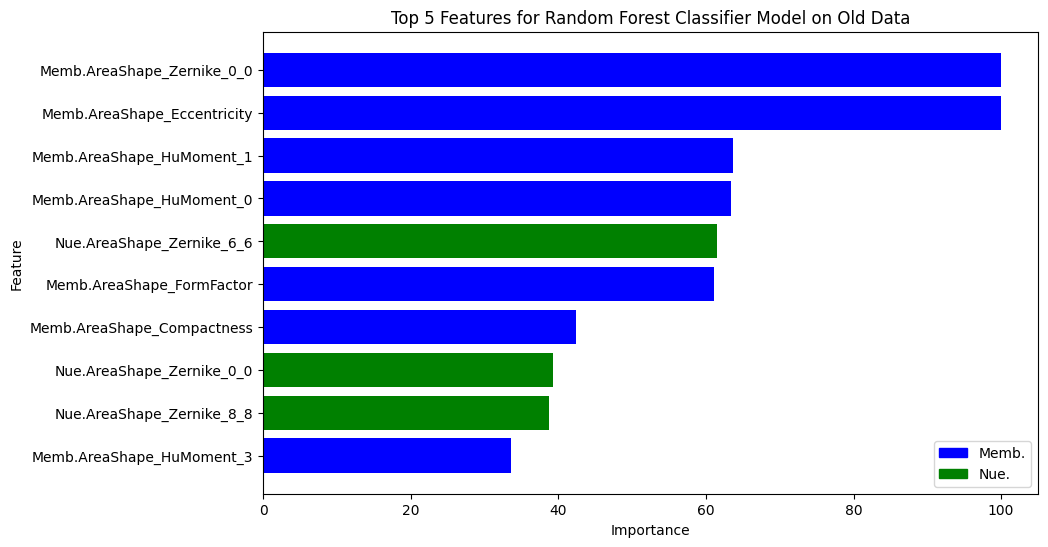

In [76]:
# Top features
top_features(rf3, 'Top 5 Features for Random Forest Classifier Model on Old Data', 'Metrics/top_features_rf_on_old_data.png')